<a href="https://colab.research.google.com/github/ValentinoTriadi/Tubes2_AI/blob/main/src/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IF3170 Artificial Intelligence | Tugas Besar 2

This notebook serves as a template for the assignment. Please create a copy of this notebook to complete your work. You can add more code blocks, markdown blocks, or new sections if needed.


Group Number: 03

Group Members:
- Shabrina Maharani (135522134)
- Muhammad Davis Adhipramana (13522157)
- Valentino Chryslie Triadi (1352264)
- Pradipta Rafa Mahesa (13522162)

## Import Libraries

In [ ]:
!pip install pandas numpy scipy matplotlib seaborn sklearn
!pip install statsmodels
!pip install imbalanced-learn
import pandas as pd
import numpy as np
from scipy.stats import normaltest
from sklearn.model_selection import train_test_split
from scipy import stats
import matplotlib.pyplot as plt
from collections import Counter
from scipy.spatial.distance import cdist
from concurrent.futures import ThreadPoolExecutor
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
import statsmodels.api as sm
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from scipy.stats import boxcox, yeojohnson
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score
from sklearn.base import BaseEstimator, TransformerMixin
from scipy.stats import shapiro
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


## Import Dataset

In [ ]:
# Training data
additional_features_train = pd.read_csv('https://drive.google.com/uc?id=1U5GXRtRK5W_HvhHgmL0_WfpLqK9knQmn')
basic_features_train = pd.read_csv('https://drive.google.com/uc?id=1aBJQYbB7CthqOVGt4oKzAqLtkOlPO28T')
content_features_train = pd.read_csv('https://drive.google.com/uc?id=1fjIX2NyIByWAlWeGsT3hox0wJy9klZB2')
flow_features_train = pd.read_csv('https://drive.google.com/uc?id=1DWPivlTrYslwbg02c3ZOi5intJNzoHs_')
labels_train = pd.read_csv('https://drive.google.com/uc?id=1R8ulAaiZzT8pzHy7sU30x78R1toT419z')
time_features_train = pd.read_csv('https://drive.google.com/uc?id=1a7KEqwps5PCHFgaaiVwmgWaIVPYUGA1O')
UNSW_NB15_features_modified_train = pd.read_csv('https://drive.google.com/uc?id=11321fm_VgbQvIpqAUdvKK6_8xVJPLAoO')

# Test Data
additional_features_test = pd.read_csv('https://drive.google.com/uc?id=1YBTW981fy9CtLwRbIjz5vmtH4f9J1HA-')
basic_features_test = pd.read_csv('https://drive.google.com/uc?id=1gN0x1uEKVEbqpUemzAGVoZfEoiopxjsq')
content_features_test = pd.read_csv('https://drive.google.com/uc?id=1T0te0X7M8MXXWy22-0kNVPTEXhwXYHBx')
flow_features_test = pd.read_csv('https://drive.google.com/uc?id=1y6f6-mujhFDZUEifc7L7P1wvYNShtGVD')
time_features_test = pd.read_csv('https://drive.google.com/uc?id=1kdOlKg_GWMWo7Wzu9yZaMh21o3REqbxx')
UNSW_NB15_features_modified_test = pd.read_csv('https://drive.google.com/uc?id=1V6Qkv_kqMClrpM_ooMJKZ8G3J82p9KOP')

In [ ]:
# Data Merge

# Training Data
data_train = pd.merge(basic_features_train, additional_features_train, on='id')
data_train = pd.merge(data_train, content_features_train, on='id')
data_train = pd.merge(data_train, flow_features_train, on='id')
data_train = pd.merge(data_train, labels_train, on='id')
data_train = pd.merge(data_train, time_features_train, on='id')

# Test Data
data_test = pd.merge(basic_features_test, additional_features_test, on='id')
data_test = pd.merge(data_test, content_features_test, on='id')
data_test = pd.merge(data_test, flow_features_test, on='id')
data_test = pd.merge(data_test, time_features_test, on='id')

# Exploratory Data Analysis

Exploratory Data Analysis (EDA) is a crucial step in the data analysis process that involves examining and visualizing data sets to uncover patterns, trends, anomalies, and insights. It is the first step before applying more advanced statistical and machine learning techniques. EDA helps you to gain a deep understanding of the data you are working with, allowing you to make informed decisions and formulate hypotheses for further analysis.

### Deskripsi Data


#### Struktur Data

In [ ]:
# Attribute dan Tipe data Data Train
print(data_train.dtypes)

state                 object
dur                  float64
sbytes               float64
dbytes               float64
sttl                 float64
dttl                 float64
sloss                float64
dloss                float64
service               object
sload                float64
dload                float64
spkts                float64
dpkts                float64
id                     int64
is_sm_ips_ports      float64
ct_state_ttl         float64
ct_flw_http_mthd     float64
is_ftp_login         float64
ct_ftp_cmd           float64
ct_srv_src           float64
ct_srv_dst           float64
ct_dst_ltm           float64
ct_src_ltm           float64
ct_src_dport_ltm     float64
ct_dst_sport_ltm     float64
ct_dst_src_ltm       float64
swin                 float64
dwin                 float64
stcpb                float64
dtcpb                float64
smean                float64
dmean                float64
trans_depth          float64
response_body_len    float64
proto         

In [ ]:
# Data Dimension (Column used and Rows Length)
print("Data Dimension : ")
print(f"instance (rows): ", {data_train.shape[0]})
print(f"features (columns): ", {data_train.shape[1]})

Data Dimension : 
instance (rows):  {175341}
features (columns):  {44}


#### Nilai Ringkasan Statistik

In [ ]:
# Data Attributes Manipulation

# Change binary attributes to categorical
for col in data_train.columns:
    if data_train[col].nunique() == 2:
        data_train[col] = data_train[col].astype('object')

# Numerical Attributes
data_train_numeric = data_train.select_dtypes(include=[np.number])

# Categorical Attributes
data_train_categorical = data_train.select_dtypes(include=["object"])

In [ ]:
# Statistic Descriptive
data_train_numeric.describe()

dur        sbytes        dbytes           sttl  \
count  166619.000000  1.667800e+05  1.664720e+05  166516.000000   
mean        1.359299  8.734079e+03  1.493589e+04     179.521944   
std         6.485386  1.712289e+05  1.430150e+05     102.957427   
min         0.000000  2.800000e+01  0.000000e+00       0.000000   
25%         0.000008  1.140000e+02  0.000000e+00      62.000000   
50%         0.001548  4.500000e+02  1.640000e+02     254.000000   
75%         0.667311  1.418000e+03  1.096000e+03     254.000000   
max        59.999989  1.296523e+07  1.465555e+07     255.000000   

                dttl          sloss          dloss         sload  \
count  166687.000000  166547.000000  166363.000000  1.665550e+05   
mean       79.584179       4.904790       6.971688  7.342186e+07   
std       110.494848      64.867849      51.801936  1.884564e+08   
min         0.000000       0.000000       0.000000  0.000000e+00   
25%         0.000000       0.000000       0.000000  1.303032e+04   
50%        29.000000       0.000000       0.000000  8.714544e+05   
75%       252.000000       3.000000       2.000000  8.888889e+07   
max       254.000000    4803.000000    5484.000000  5.988000e+09   

              dload          spkts  ...          dmean    trans_depth  \
count  1.665040e+05  166687.000000  ...  166486.000000  166556.000000   
mean   6.718596e+05      20.266134  ...     124.161041       0.106193   
std    2.422879e+06     136.433895  ...     258.265755       0.794070   
min    0.000000e+00       1.000000  ...       0.000000       0.000000   
25%    0.000000e+00       2.000000  ...       0.000000       0.000000   
50%    1.426630e+03       2.000000  ...      44.000000       0.000000   
75%    2.807410e+04      12.000000  ...      89.000000       0.000000   
max    2.242273e+07    9616.000000  ...    1458.000000     172.000000   

       response_body_len          sjit           djit         sinpkt  \
count       1.665500e+05  1.666030e+05  166495.000000  166634.000000   
mean        2.157133e+03  4.993982e+03     604.891720     987.360974   
std         5.509898e+04  4.506783e+04    4082.439167    7246.462797   
min         0.000000e+00  0.000000e+00       0.000000       0.000000   
25%         0.000000e+00  0.000000e+00       0.000000       0.008000   
50%         0.000000e+00  0.000000e+00       0.000000       0.284723   
75%         0.000000e+00  2.511184e+03     114.753348      55.205806   
max         6.558056e+06  1.460480e+06  289388.269700   84371.496000   

              dinpkt         tcprtt         synack         ackdat  
count  166607.000000  166505.000000  166605.000000  166746.000000  
mean       87.763617       0.041331       0.021042       0.020402  
std       987.040024       0.079428       0.043560       0.040619  
min         0.000000       0.000000       0.000000       0.000000  
25%         0.000000       0.000000       0.000000       0.000000  
50%         0.006000       0.000000       0.000000       0.000000  
75%        50.933127       0.065151       0.023235       0.038951  
max     56716.824000       2.518893       2.100352       1.520884  

[8 rows x 38 columns]

In [ ]:
# Frequency Distribution
for col in data_train_categorical.columns:
    print(data_train[col].value_counts())

state
INT    78148
FIN    73925
CON    12481
REQ     1889
RST       78
ECO       12
URN        1
PAR        1
no         1
Name: count, dtype: int64
service
-           89434
dns         44909
http        17784
smtp         4815
ftp-data     3795
ftp          3263
ssh          1242
pop3         1054
dhcp           93
snmp           75
ssl            51
irc            25
radius         10
Name: count, dtype: int64
is_sm_ips_ports
0.0    163963
1.0      2632
Name: count, dtype: int64
proto
tcp       75902
udp       60105
unas      11480
arp        2726
ospf       2468
          ...  
visa         89
leaf-2       89
igmp         18
icmp         13
rtp           1
Name: count, Length: 133, dtype: int64
attack_cat
Normal            56000
Generic           40000
Exploits          33393
Fuzzers           18184
DoS               12264
Reconnaissance    10491
Analysis           2000
Backdoor           1746
Shellcode          1133
Worms               130
Name: count, dtype: int64
label
1    1193

### Eksplorasi Data


#### Analisis Statistik Deskriptif Lanjutan

In [ ]:
# Skewness
data_train_numeric.skew()

dur                    7.497794
sbytes                45.493176
dbytes                39.855276
sttl                  -0.677789
dttl                   0.895575
sloss                 45.581435
dloss                 39.579337
sload                  8.684336
dload                  4.688723
spkts                 40.685751
dpkts                 37.333117
id                     0.000000
ct_state_ttl           0.929884
ct_flw_http_mthd      23.269418
is_ftp_login          10.013649
ct_ftp_cmd             9.806170
ct_srv_src             1.520744
ct_srv_dst             1.527720
ct_dst_ltm             2.050049
ct_src_ltm             1.840963
ct_src_dport_ltm       2.168197
ct_dst_sport_ltm       1.695613
ct_dst_src_ltm         1.552994
swin                   0.178198
dwin                   0.197731
stcpb                  1.080996
dtcpb                  1.080657
smean                  3.721838
dmean                  2.826843
trans_depth          164.978364
response_body_len     76.231261
sjit                  17.597719
djit                  29.669841
sinpkt                 7.912010
dinpkt                30.085852
tcprtt                 4.115667
synack                 5.877091
ackdat                 5.705092
dtype: float64

In [ ]:
# Kurtosis
data_train_numeric.kurtosis()

dur                     58.619678
sbytes                2338.223033
dbytes                2789.732048
sttl                    -1.501804
dttl                    -1.148845
sloss                 2378.463744
dloss                 2786.934289
sload                  128.997439
dload                   22.772224
spkts                 2015.970520
dpkts                 2514.304292
id                      -1.200000
ct_state_ttl             4.466880
ct_flw_http_mthd       836.020588
is_ftp_login           147.541827
ct_ftp_cmd             138.744477
ct_srv_src               1.342816
ct_srv_dst               1.316868
ct_dst_ltm               4.010019
ct_src_ltm               3.087584
ct_src_dport_ltm         4.416127
ct_dst_sport_ltm         1.906041
ct_dst_src_ltm           1.302738
swin                    -1.968236
dwin                    -1.960916
stcpb                   -0.316500
dtcpb                   -0.316873
smean                   14.115394
dmean                    7.689588
trans_depth          33191.541992
response_body_len     7638.123166
sjit                   348.416916
djit                  1341.080697
sinpkt                  61.142936
dinpkt                1186.970772
tcprtt                  53.212890
synack                 120.932768
ackdat                 110.751924
dtype: float64

In [ ]:
# Normality test using D'Agustino
data_normal = []
data_not_normal = []

for column in data_train_numeric.columns:
    stat, p = normaltest(data_train_numeric[column])
    alpha = 0.05
    if p > alpha:
        data_normal.append(column)
    else:
        data_not_normal.append(column)

print(f'Normal Data: {data_normal}')
print(f'Length :  {len(data_normal)}')
print(f'Not Normal Data: {data_not_normal}')
print(f'Length : {len(data_not_normal)}')

Normal Data: []
Length :  0
Not Normal Data: ['dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'sload', 'dload', 'spkts', 'dpkts', 'id', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'sjit', 'djit', 'sinpkt', 'dinpkt', 'tcprtt', 'synack', 'ackdat']
Length : 38


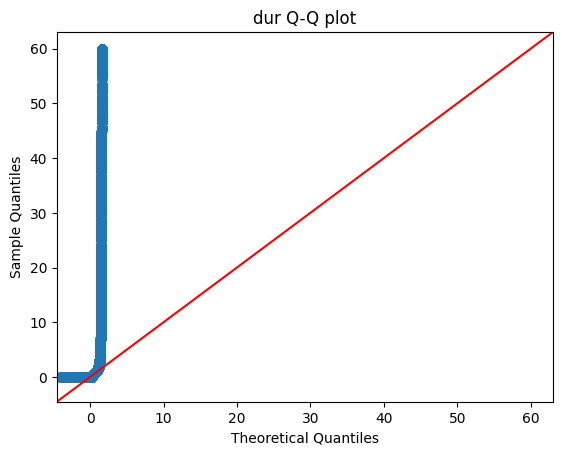

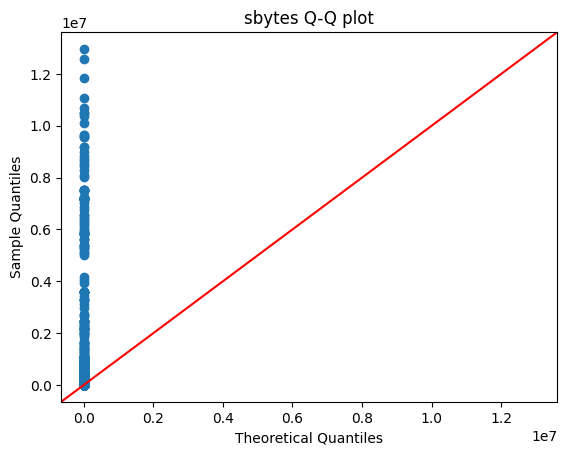

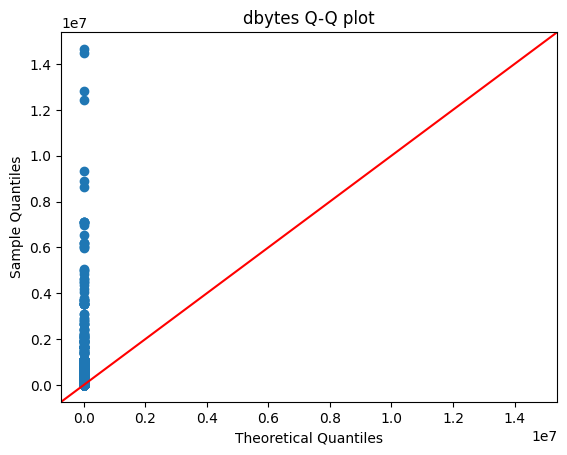

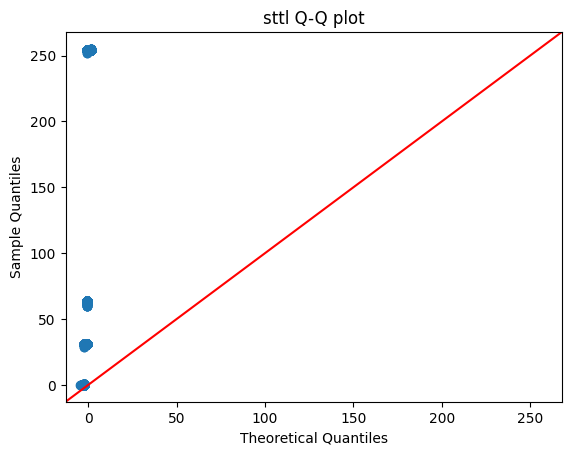

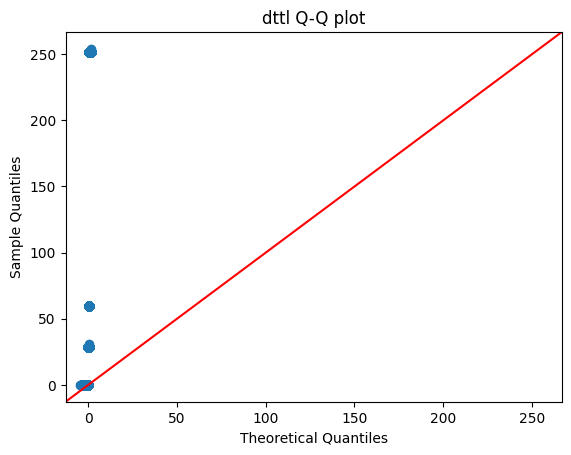

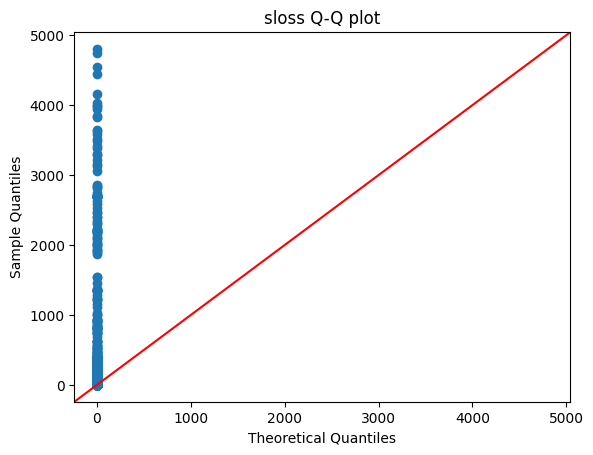

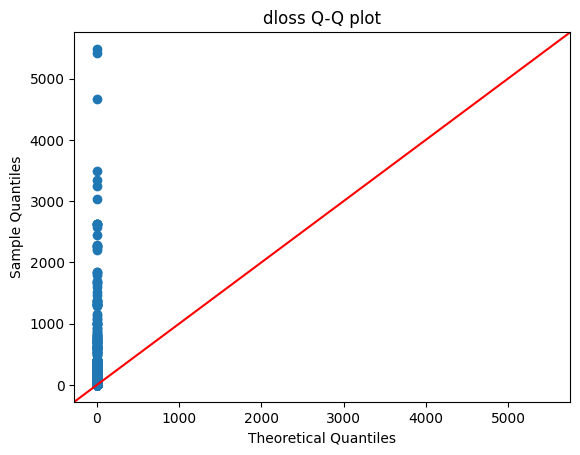

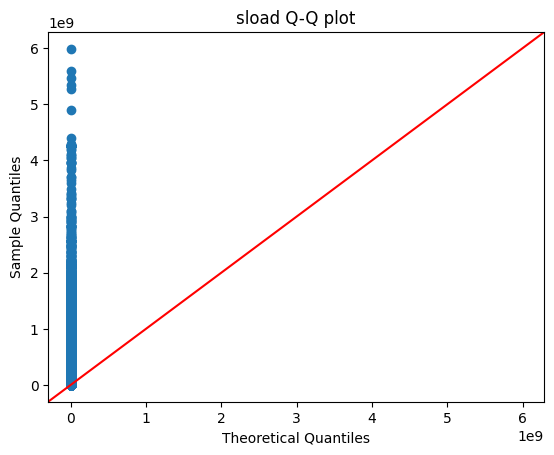

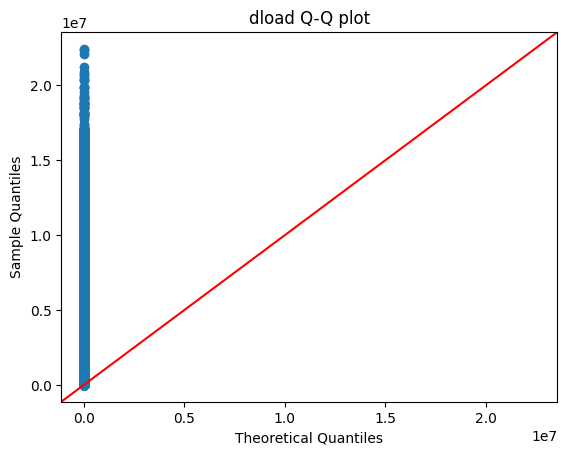

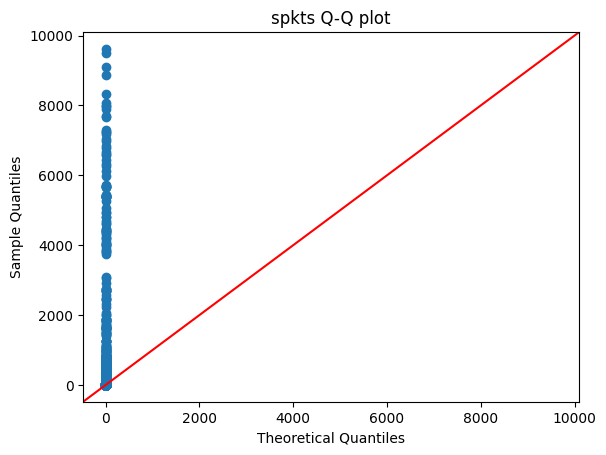

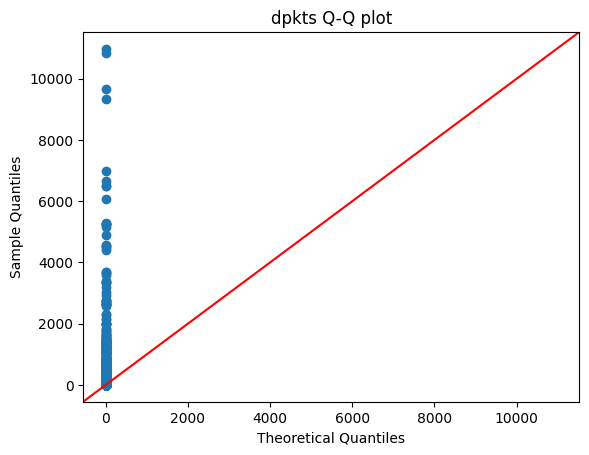

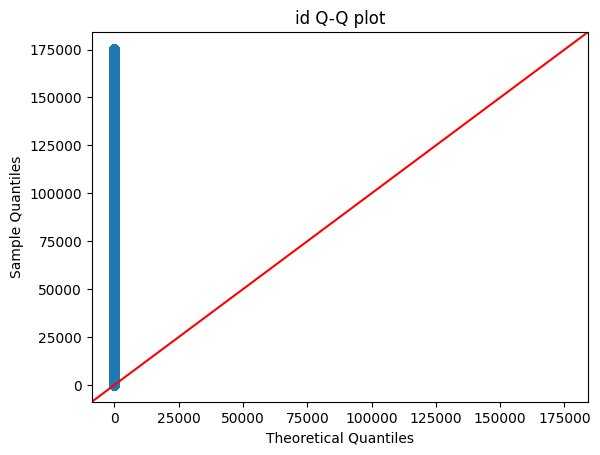

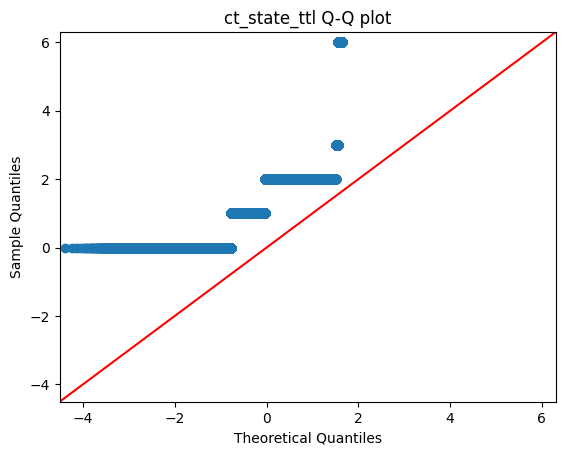

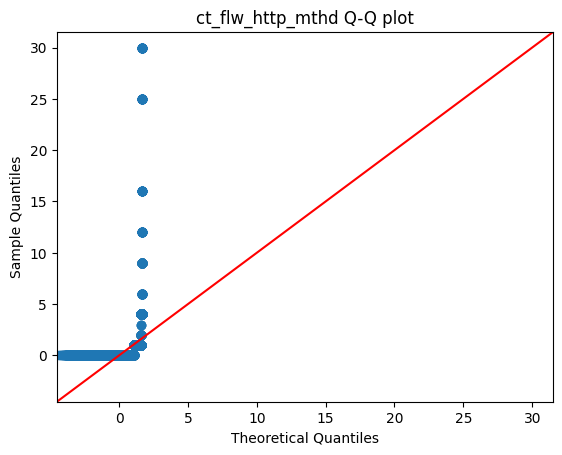

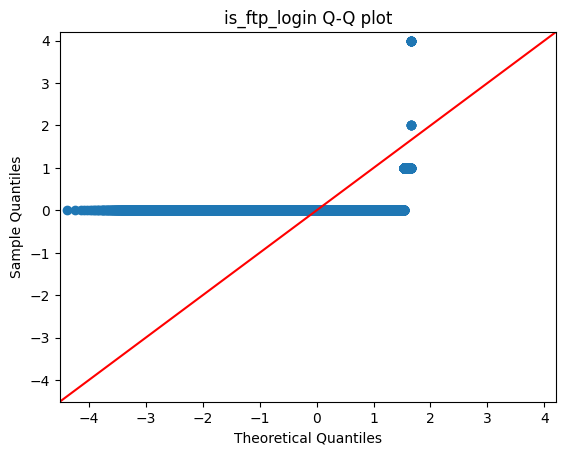

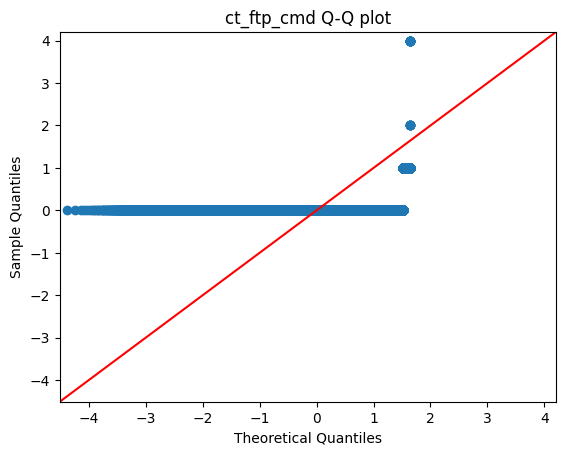

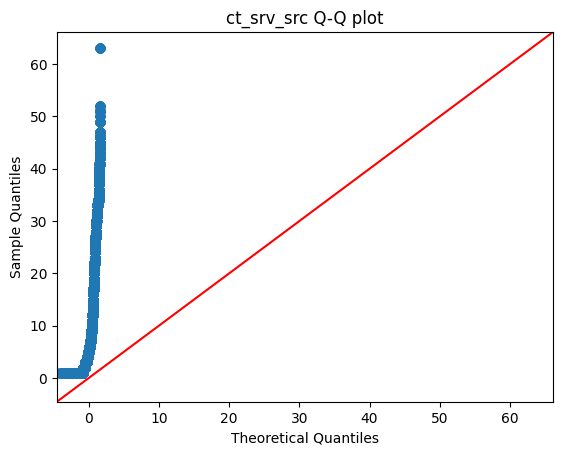

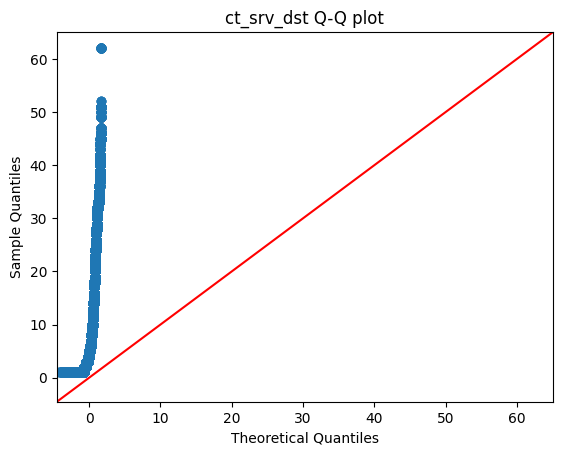

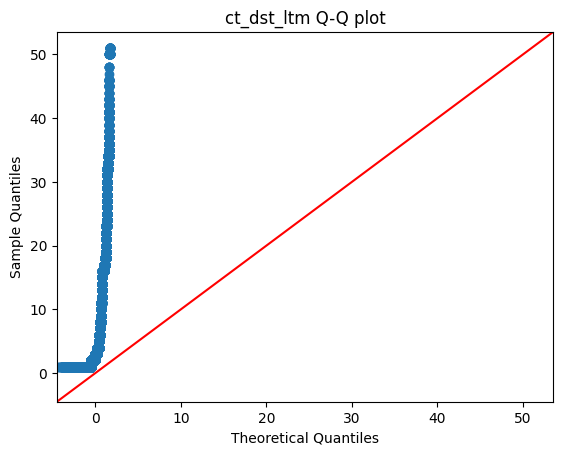

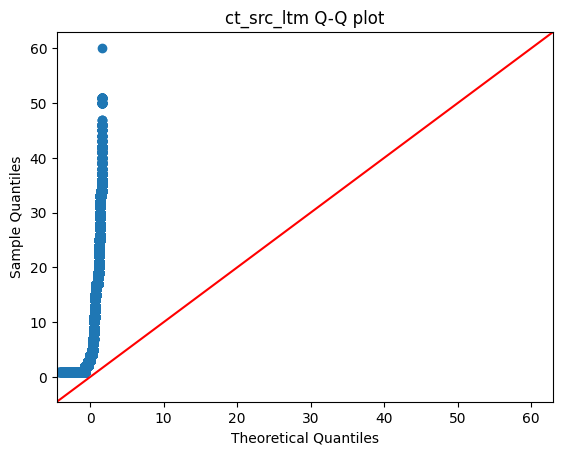

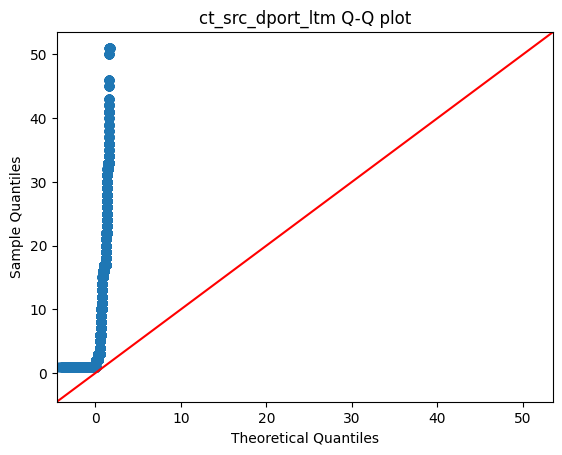

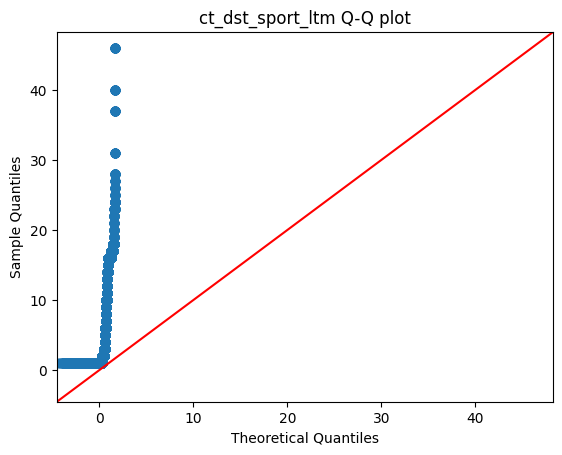

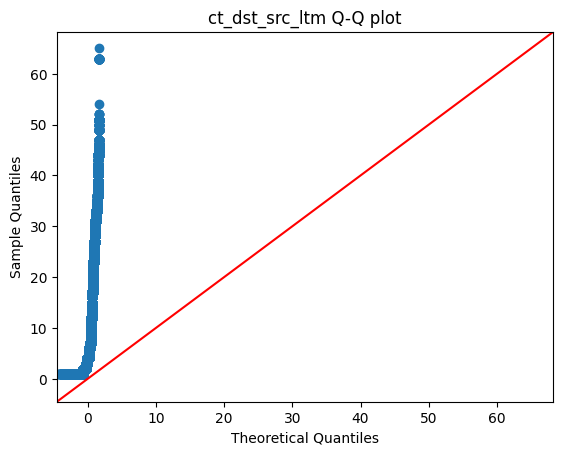

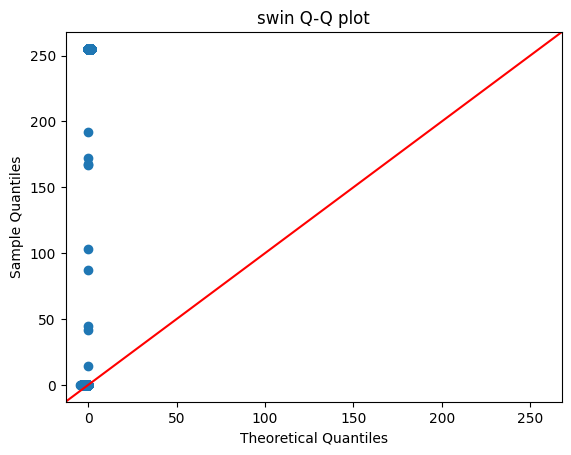

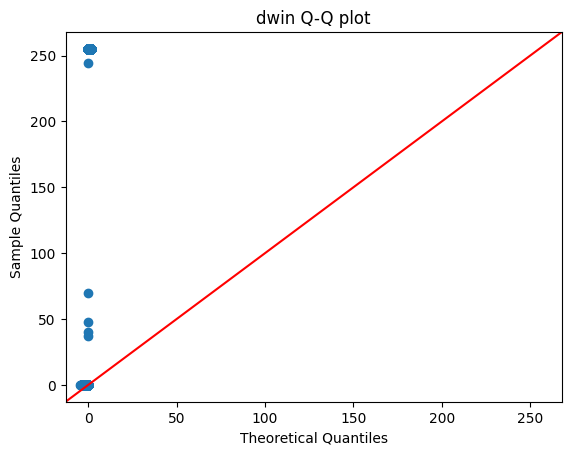

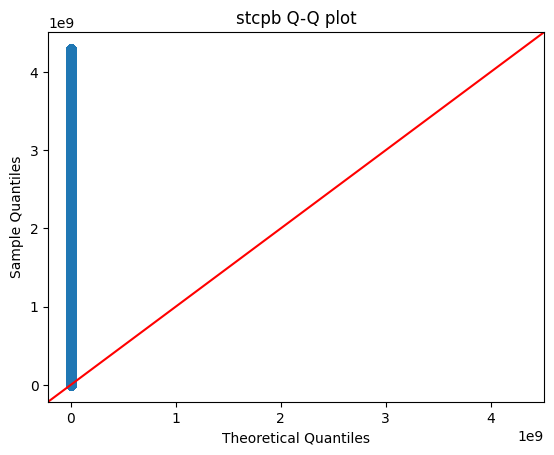

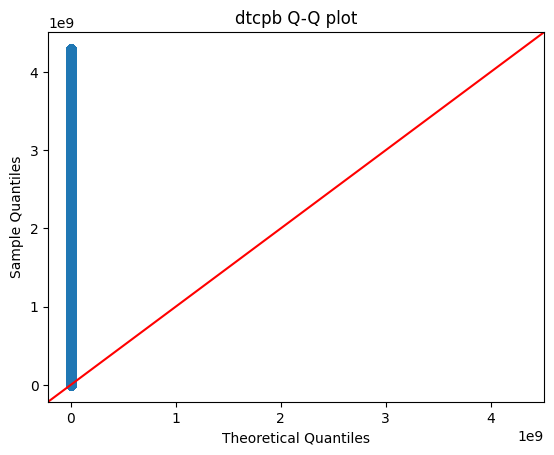

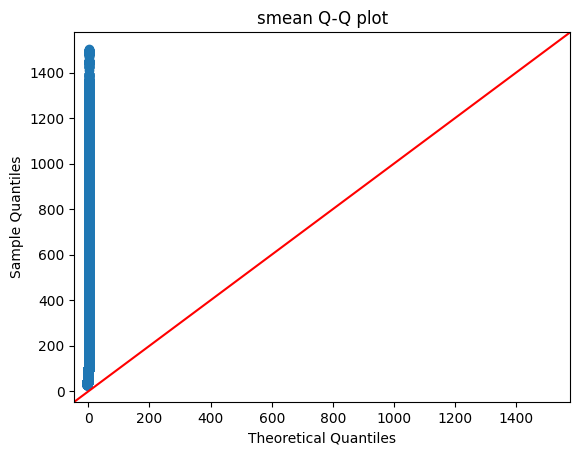

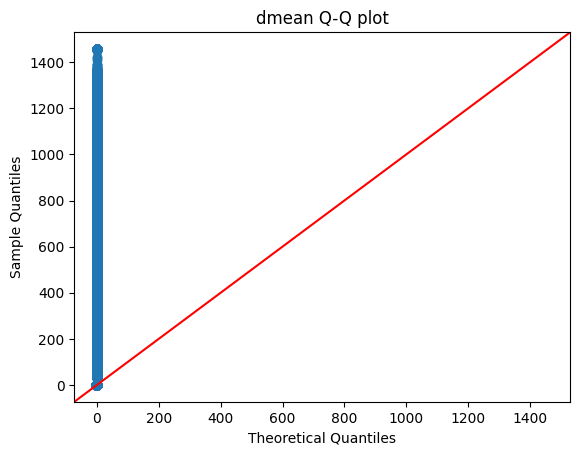

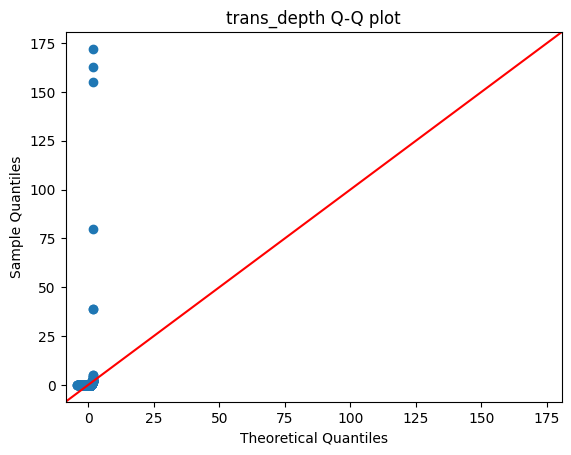

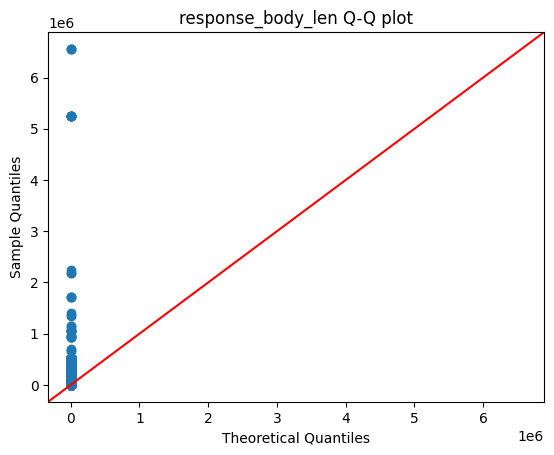

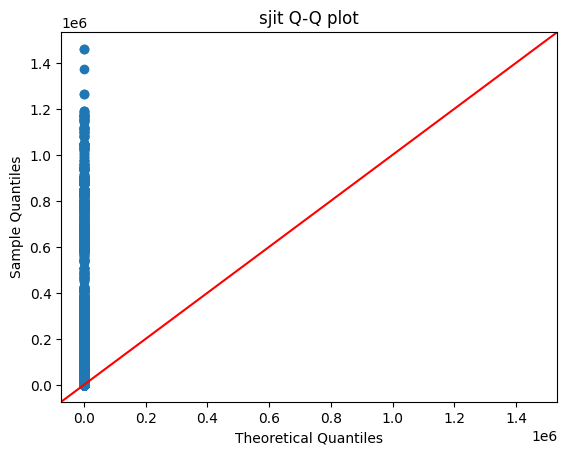

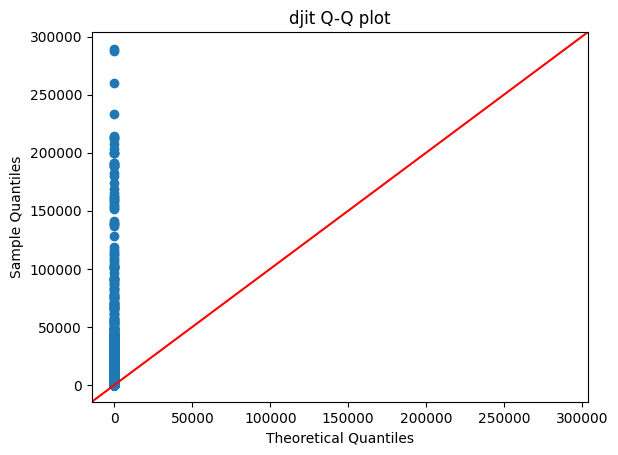

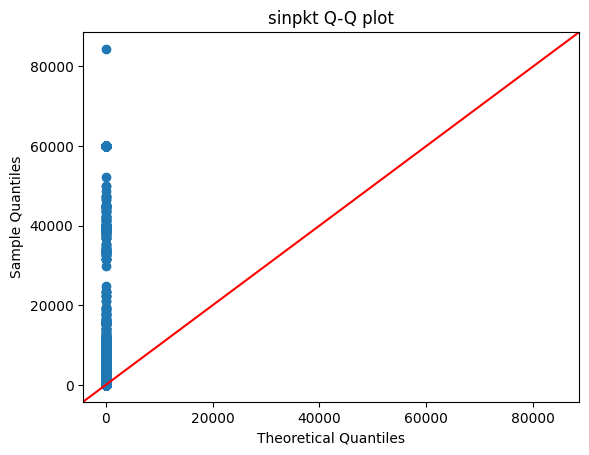

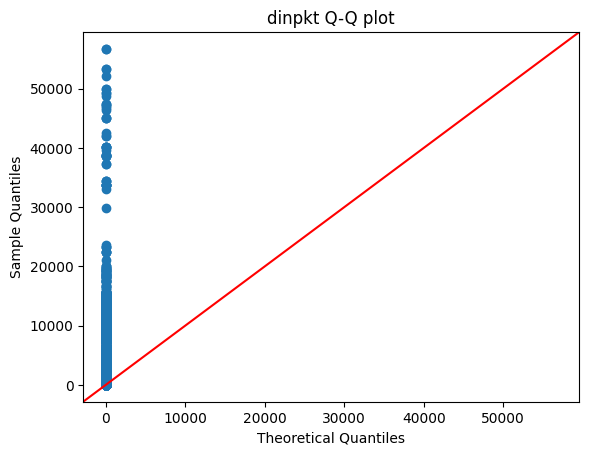

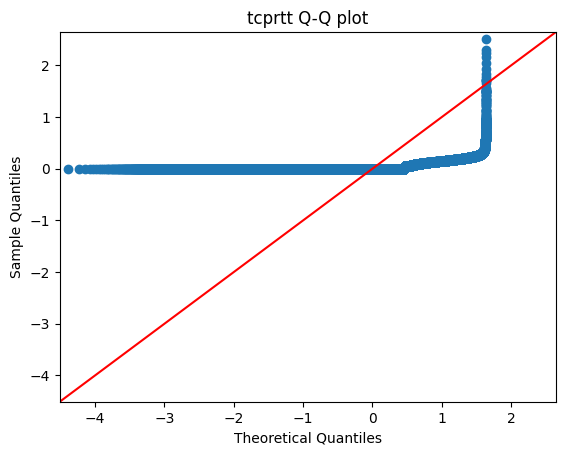

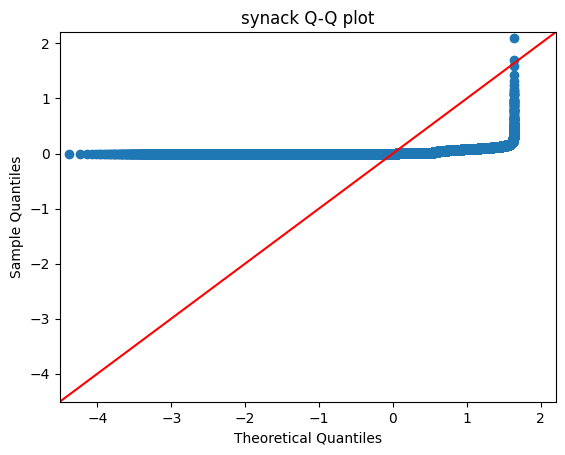

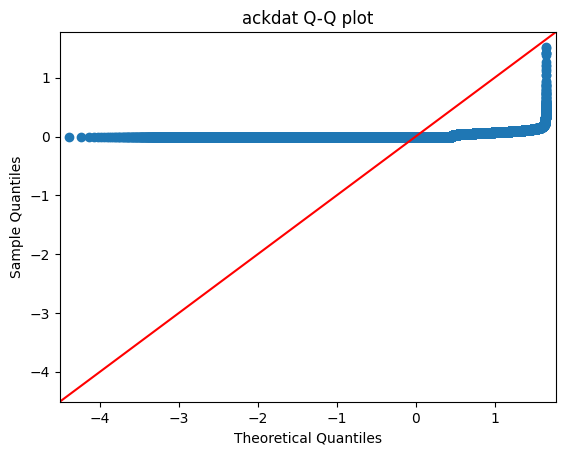

In [ ]:
# Distribution by Q-Q Plot
for column in data_train_numeric.columns:
    sm.qqplot(data_train_numeric[column], line='45')
    plt.title(f'{column} Q-Q plot')
    plt.show()

#### Analisis Hubungan Antar Variable

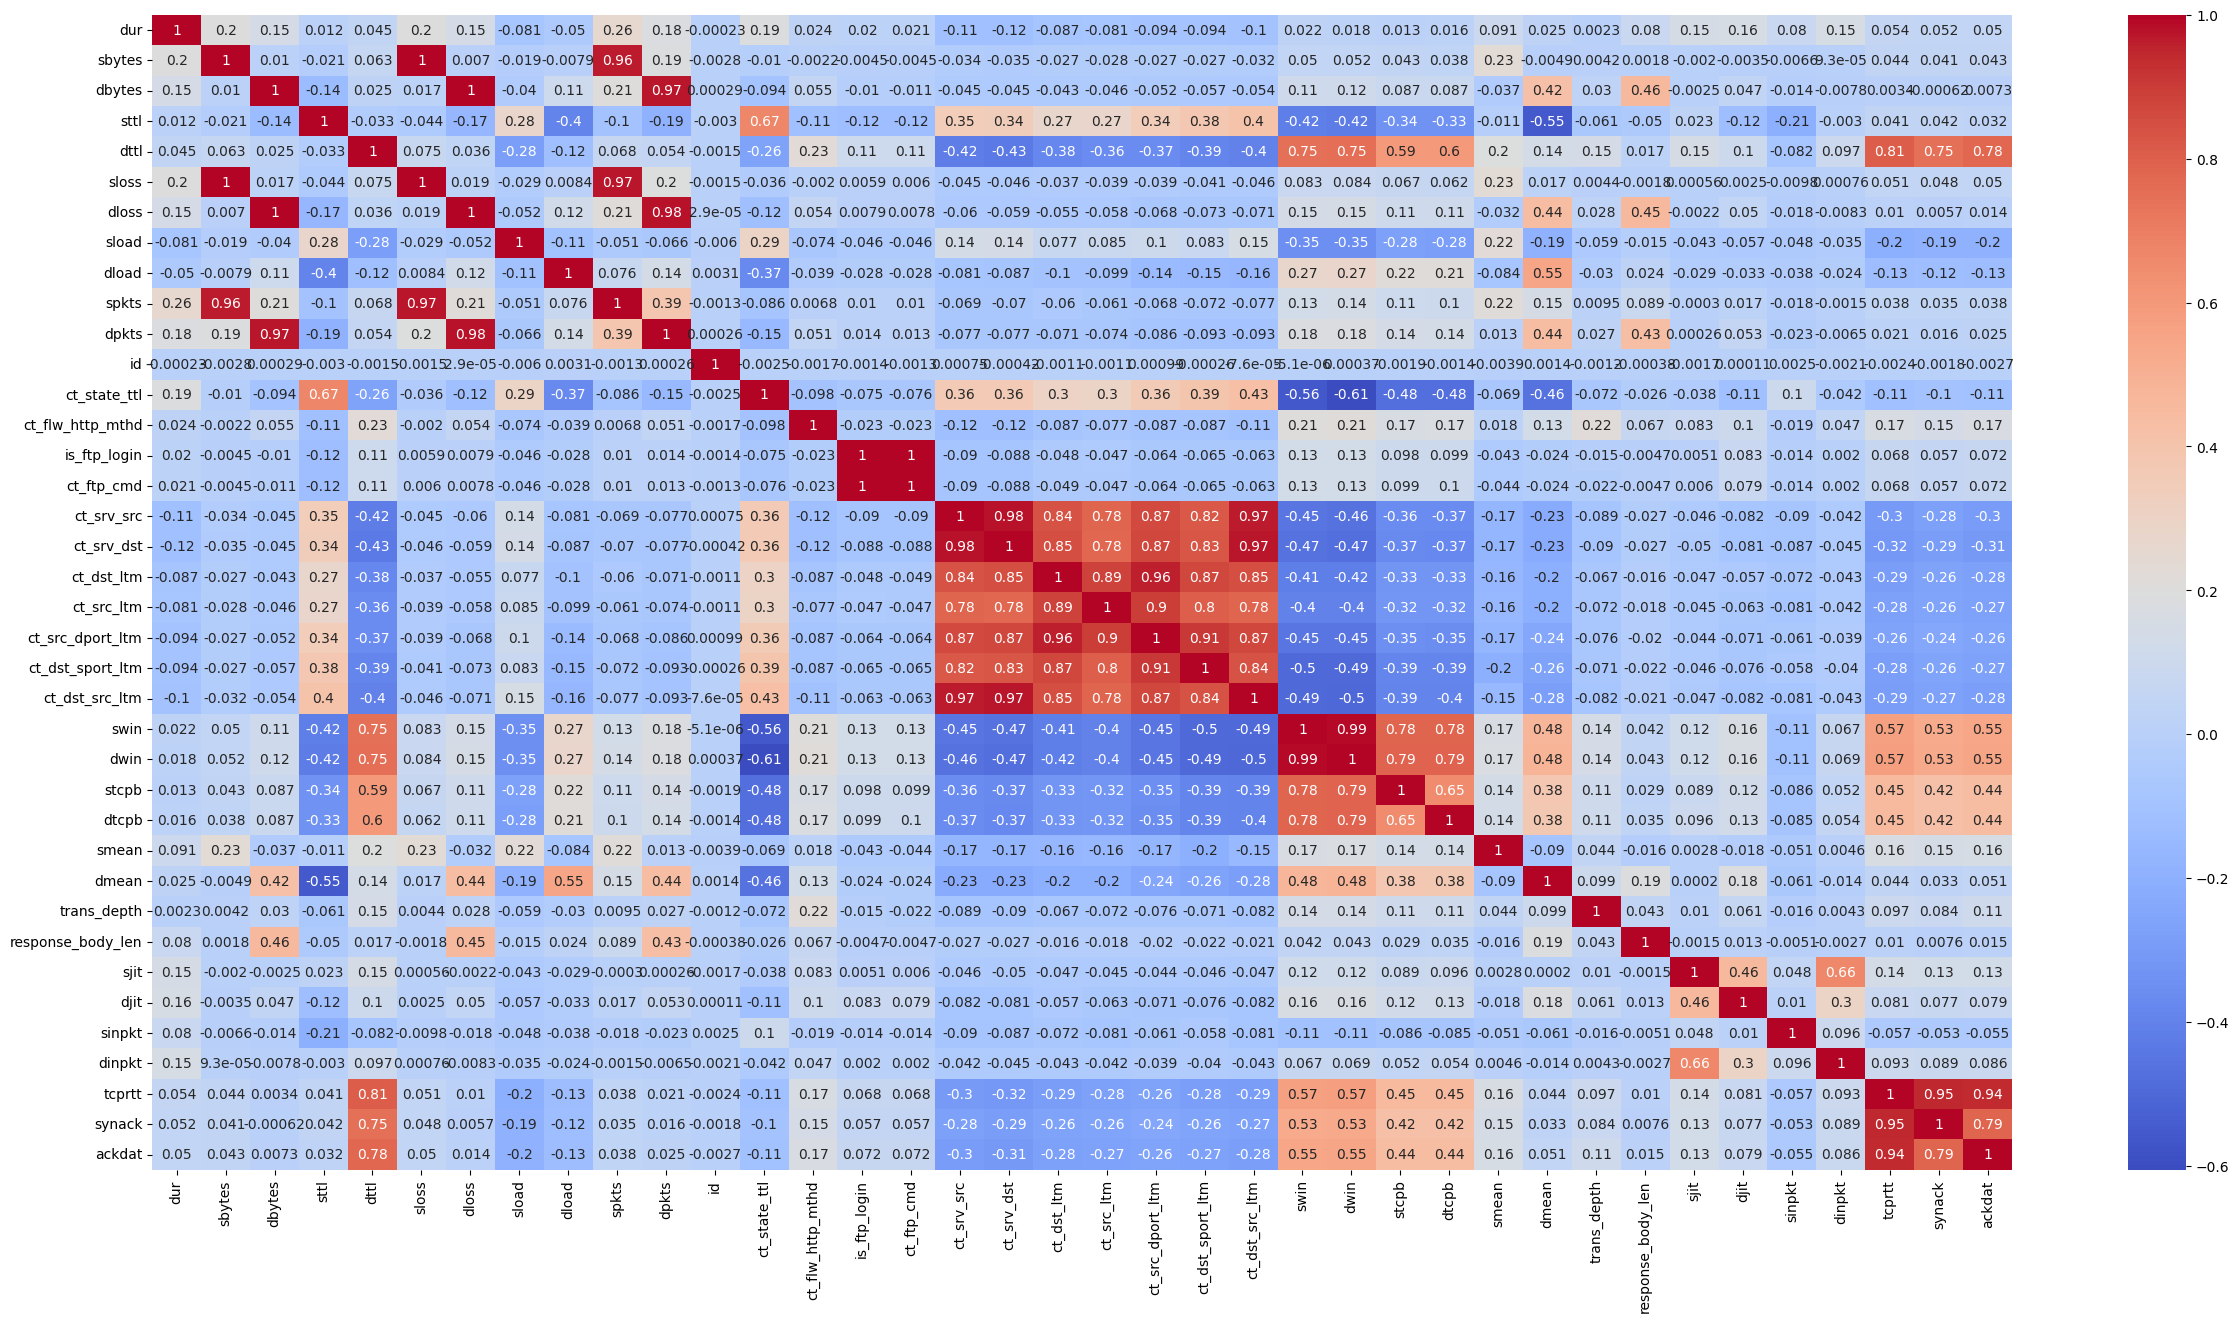

In [ ]:
# Numerical Correllation Matrix
correlation_matrix = data_train_numeric.corr()
plt.figure(figsize=(30,15))
sns.heatmap(correlation_matrix,annot=True,cmap="coolwarm")
plt.show()


In [ ]:
# categorical Contegency Table
contingency_table = pd.crosstab(data_train_categorical['service'], data_train['attack_cat'])
print("Contegency Table between service dan attack_cat")
print(contingency_table)
print("\n")


contingency_table = pd.crosstab(data_train_categorical['state'], data_train['attack_cat'])
print("Contegency Table between state dan attack_cat")
print(contingency_table)
print("\n")

contingency_table = pd.crosstab(data_train_categorical['is_sm_ips_ports'], data_train['attack_cat'])
print("Contegency Table between is_sm_ips_ports dan attack_cat")
print(contingency_table)
print("\n")

contingency_table = pd.crosstab(data_train_categorical['proto'], data_train['attack_cat'])
print("Contegency Table between proto dan attack_cat")
print(contingency_table)
print("\n")

contingency_table = pd.crosstab(data_train_categorical['label'], data_train['attack_cat'])
print("Contegency Table between label dan attack_cat")
print(contingency_table)
print("\n")


Contegency Table between service dan attack_cat
attack_cat  Analysis  Backdoor   DoS  Exploits  Fuzzers  Generic  Normal  \
service                                                                    
-               1354      1563  9979     16308    15656      483   34658   
dhcp               0         0    33        51        0        9       0   
dns                0         0   105       177      341    37130    7124   
ftp                0         4    49      1539      514        2    1155   
ftp-data           0         0     8      1371        0        0    2416   
http             522        78  1148      8246      795      278    5091   
irc                0        11     4        10        0        0       0   
pop3               0         0    60       989        0        1       4   
radius             0         0     0         5        0        3       2   
smtp               6         0   277      2963        0       56    1508   
snmp               0         0    11    

#### Verifikasi Kualitas Data

In [ ]:
# Identifikasi Missing Values
missing_values = data_train.isnull().sum()
print("Total missing values for each feature:")
print(missing_values)

Total missing values for each feature:
state                8805
dur                  8722
sbytes               8561
dbytes               8869
sttl                 8825
dttl                 8654
sloss                8794
dloss                8978
service              8791
sload                8786
dload                8837
spkts                8654
dpkts                8686
id                      0
is_sm_ips_ports      8746
ct_state_ttl         8635
ct_flw_http_mthd     8647
is_ftp_login         8647
ct_ftp_cmd           8842
ct_srv_src           8851
ct_srv_dst           8774
ct_dst_ltm           8738
ct_src_ltm           8823
ct_src_dport_ltm     8775
ct_dst_sport_ltm     8788
ct_dst_src_ltm       8895
swin                 8740
dwin                 8779
stcpb                8672
dtcpb                8803
smean                8788
dmean                8855
trans_depth          8785
response_body_len    8791
proto                8826
attack_cat              0
label                   0

In [ ]:
# Identifikasi Duplikasi Data
duplicated_rows = data_train[data_train.duplicated()]
print("\nDuplikat Data:")
print(duplicated_rows)


Duplikat Data:
Empty DataFrame
Columns: [state, dur, sbytes, dbytes, sttl, dttl, sloss, dloss, service, sload, dload, spkts, dpkts, id, is_sm_ips_ports, ct_state_ttl, ct_flw_http_mthd, is_ftp_login, ct_ftp_cmd, ct_srv_src, ct_srv_dst, ct_dst_ltm, ct_src_ltm, ct_src_dport_ltm, ct_dst_sport_ltm, ct_dst_src_ltm, swin, dwin, stcpb, dtcpb, smean, dmean, trans_depth, response_body_len, proto, attack_cat, label, sjit, djit, sinpkt, dinpkt, tcprtt, synack, ackdat]
Index: []

[0 rows x 44 columns]


#### Identifikasi Outlier

In [ ]:
#Find outliers using IQR method
outliers_data = []

for column in data_train.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = data_train[column].quantile(0.25)
    Q3 = data_train[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = data_train[(data_train[column] < (Q1 - 1.5 * IQR)) | (data_train[column] > (Q3 + 1.5 * IQR))]

    # Append the column name and total outliers to the list
    outliers_data.append({"Column name": column, "Total outliers": outliers.shape[0]})

# Convert the list to a DataFrame
outliers_df = pd.DataFrame(outliers_data)

# Display the result
outliers_df

Column name  Total outliers
0                 dur           14968
1              sbytes           21760
2              dbytes           26698
3                sttl               0
4                dttl               0
5               sloss           10879
6               dloss           26996
7               sload           12843
8               dload           36132
9               spkts           23470
10              dpkts           19752
11                 id               0
12       ct_state_ttl            1838
13   ct_flw_http_mthd           16996
14       is_ftp_login            2443
15         ct_ftp_cmd            2443
16         ct_srv_src           18379
17         ct_srv_dst           18380
18         ct_dst_ltm           21021
19         ct_src_ltm           12487
20   ct_src_dport_ltm           31801
21   ct_dst_sport_ltm           35385
22     ct_dst_src_ltm           16832
23               swin               0
24               dwin               0
25              stcpb               0
26              dtcpb               0
27              smean           19690
28              dmean           22185
29        trans_depth           16948
30  response_body_len           10723
31               sjit           17146
32               djit           19538
33             sinpkt           14034
34             dinpkt           13409
35             tcprtt           15228
36             synack           29934
37             ackdat            7878

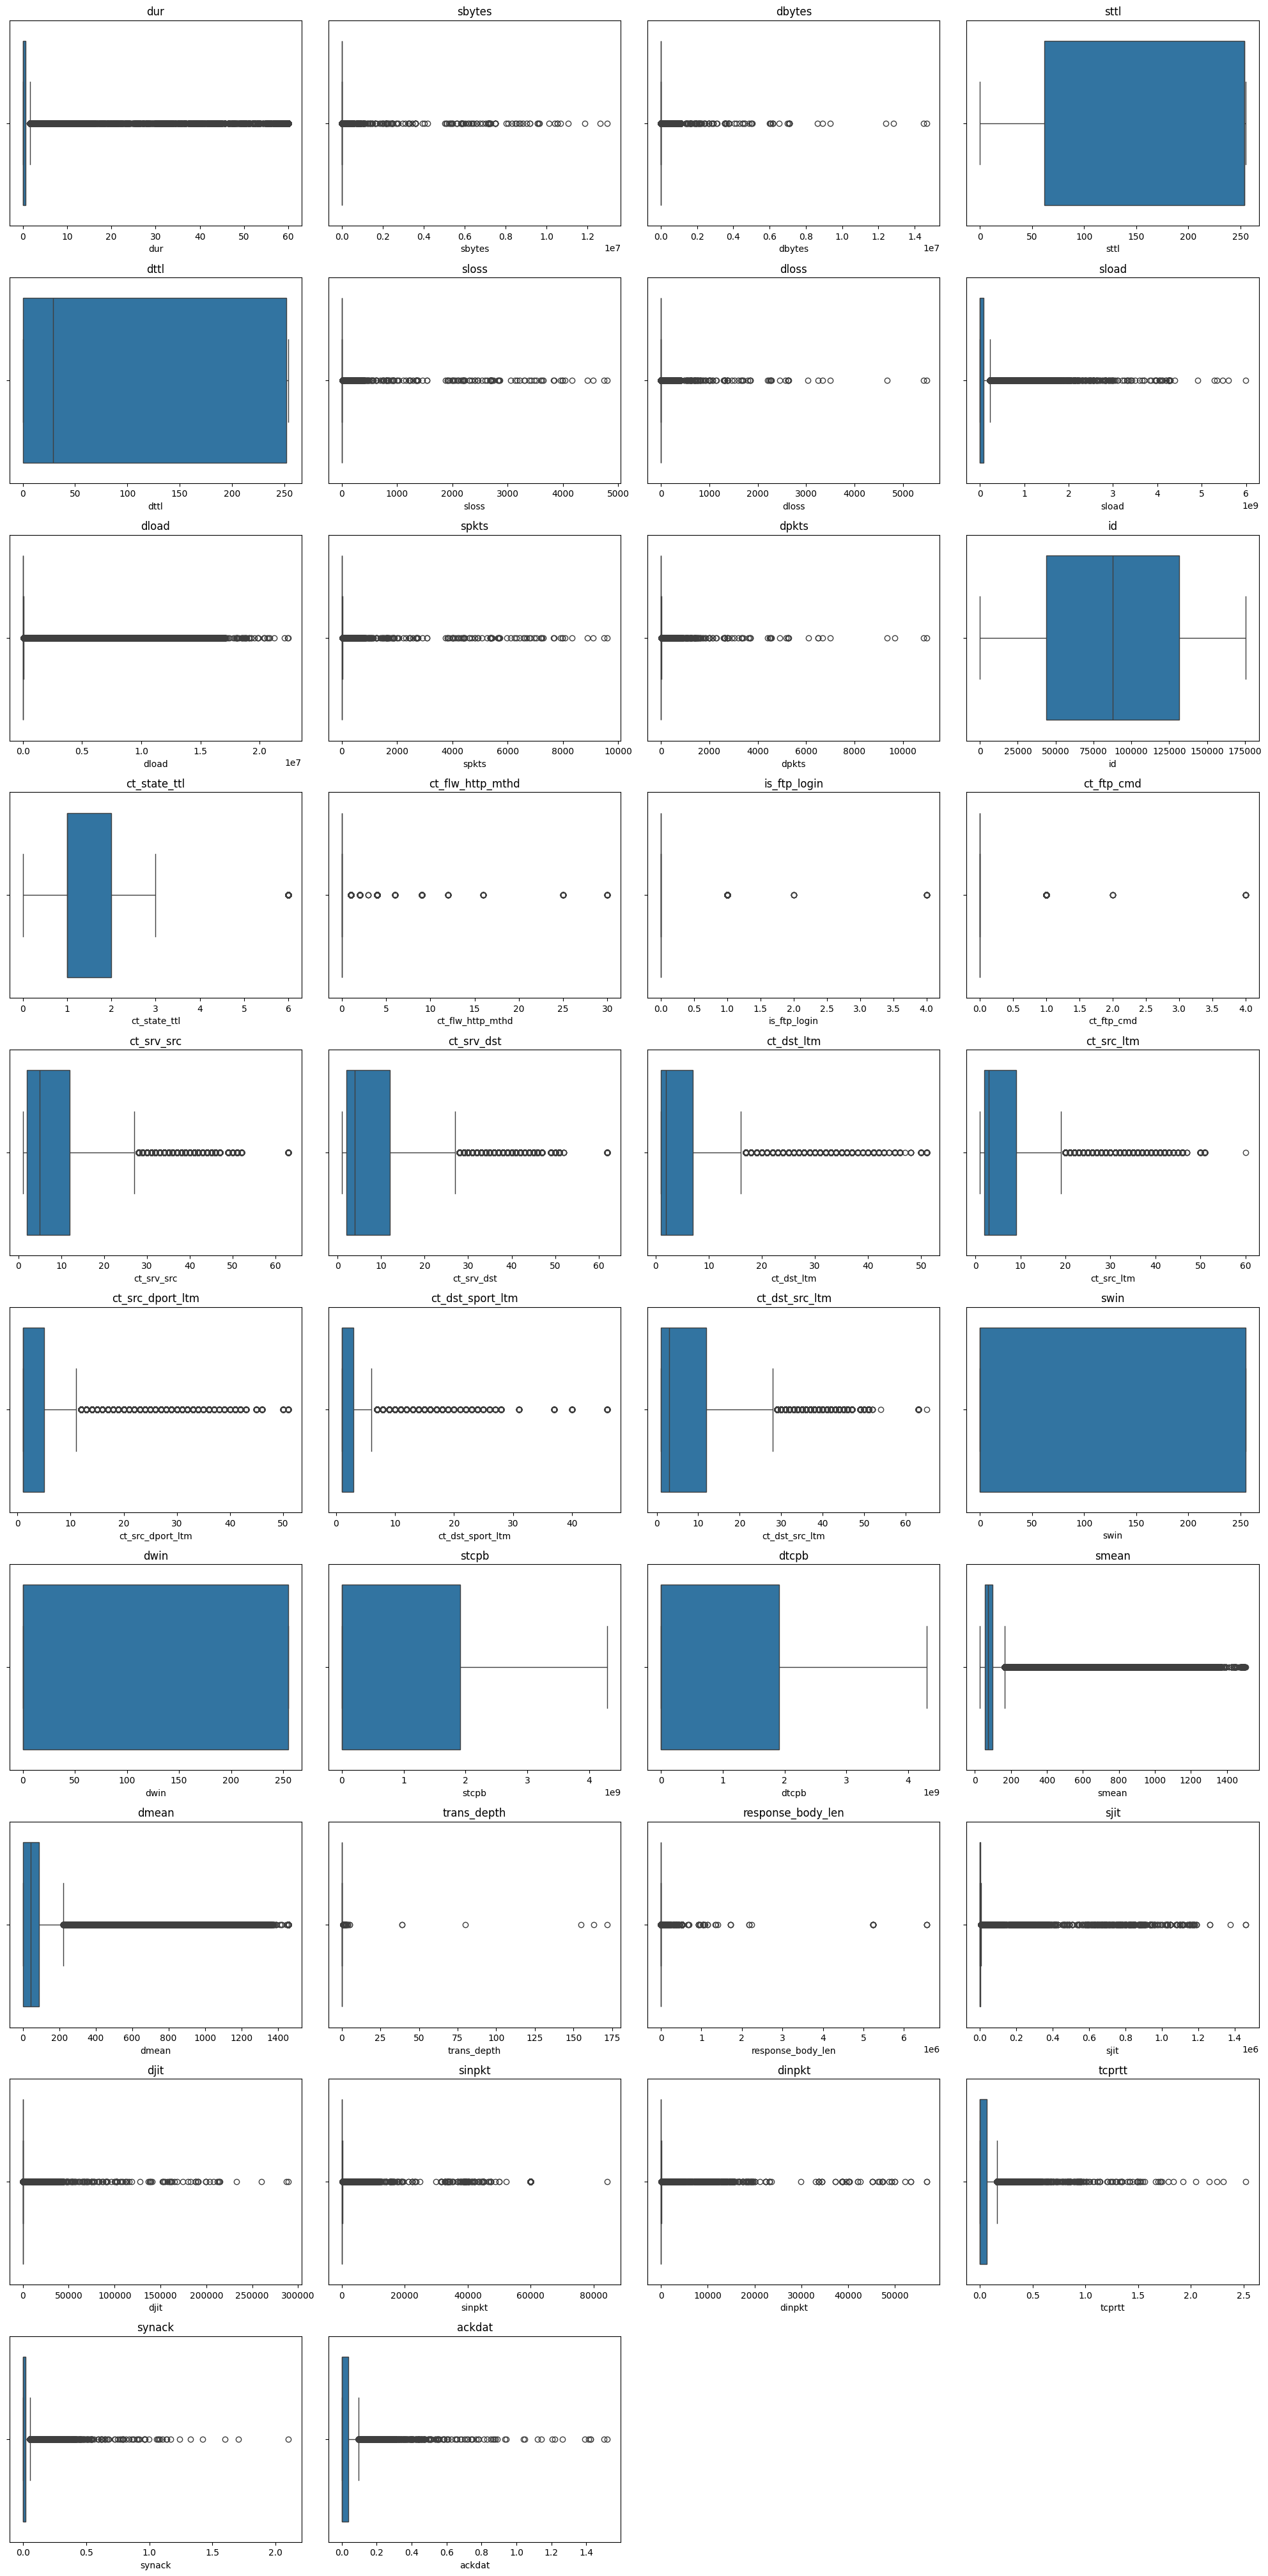

In [ ]:
# Find outliers using boxplot for each column
# Note: Outlier is pointed as a little dot outside of blue box
plt.figure(figsize=(20,44))
for i, col in enumerate(data_train.select_dtypes(include=['float64', 'int64']).columns):
    plt.subplot(11, 4, i+1)
    sns.boxplot(x=data_train[col])
    plt.title(col)

plt.tight_layout()
plt.show()

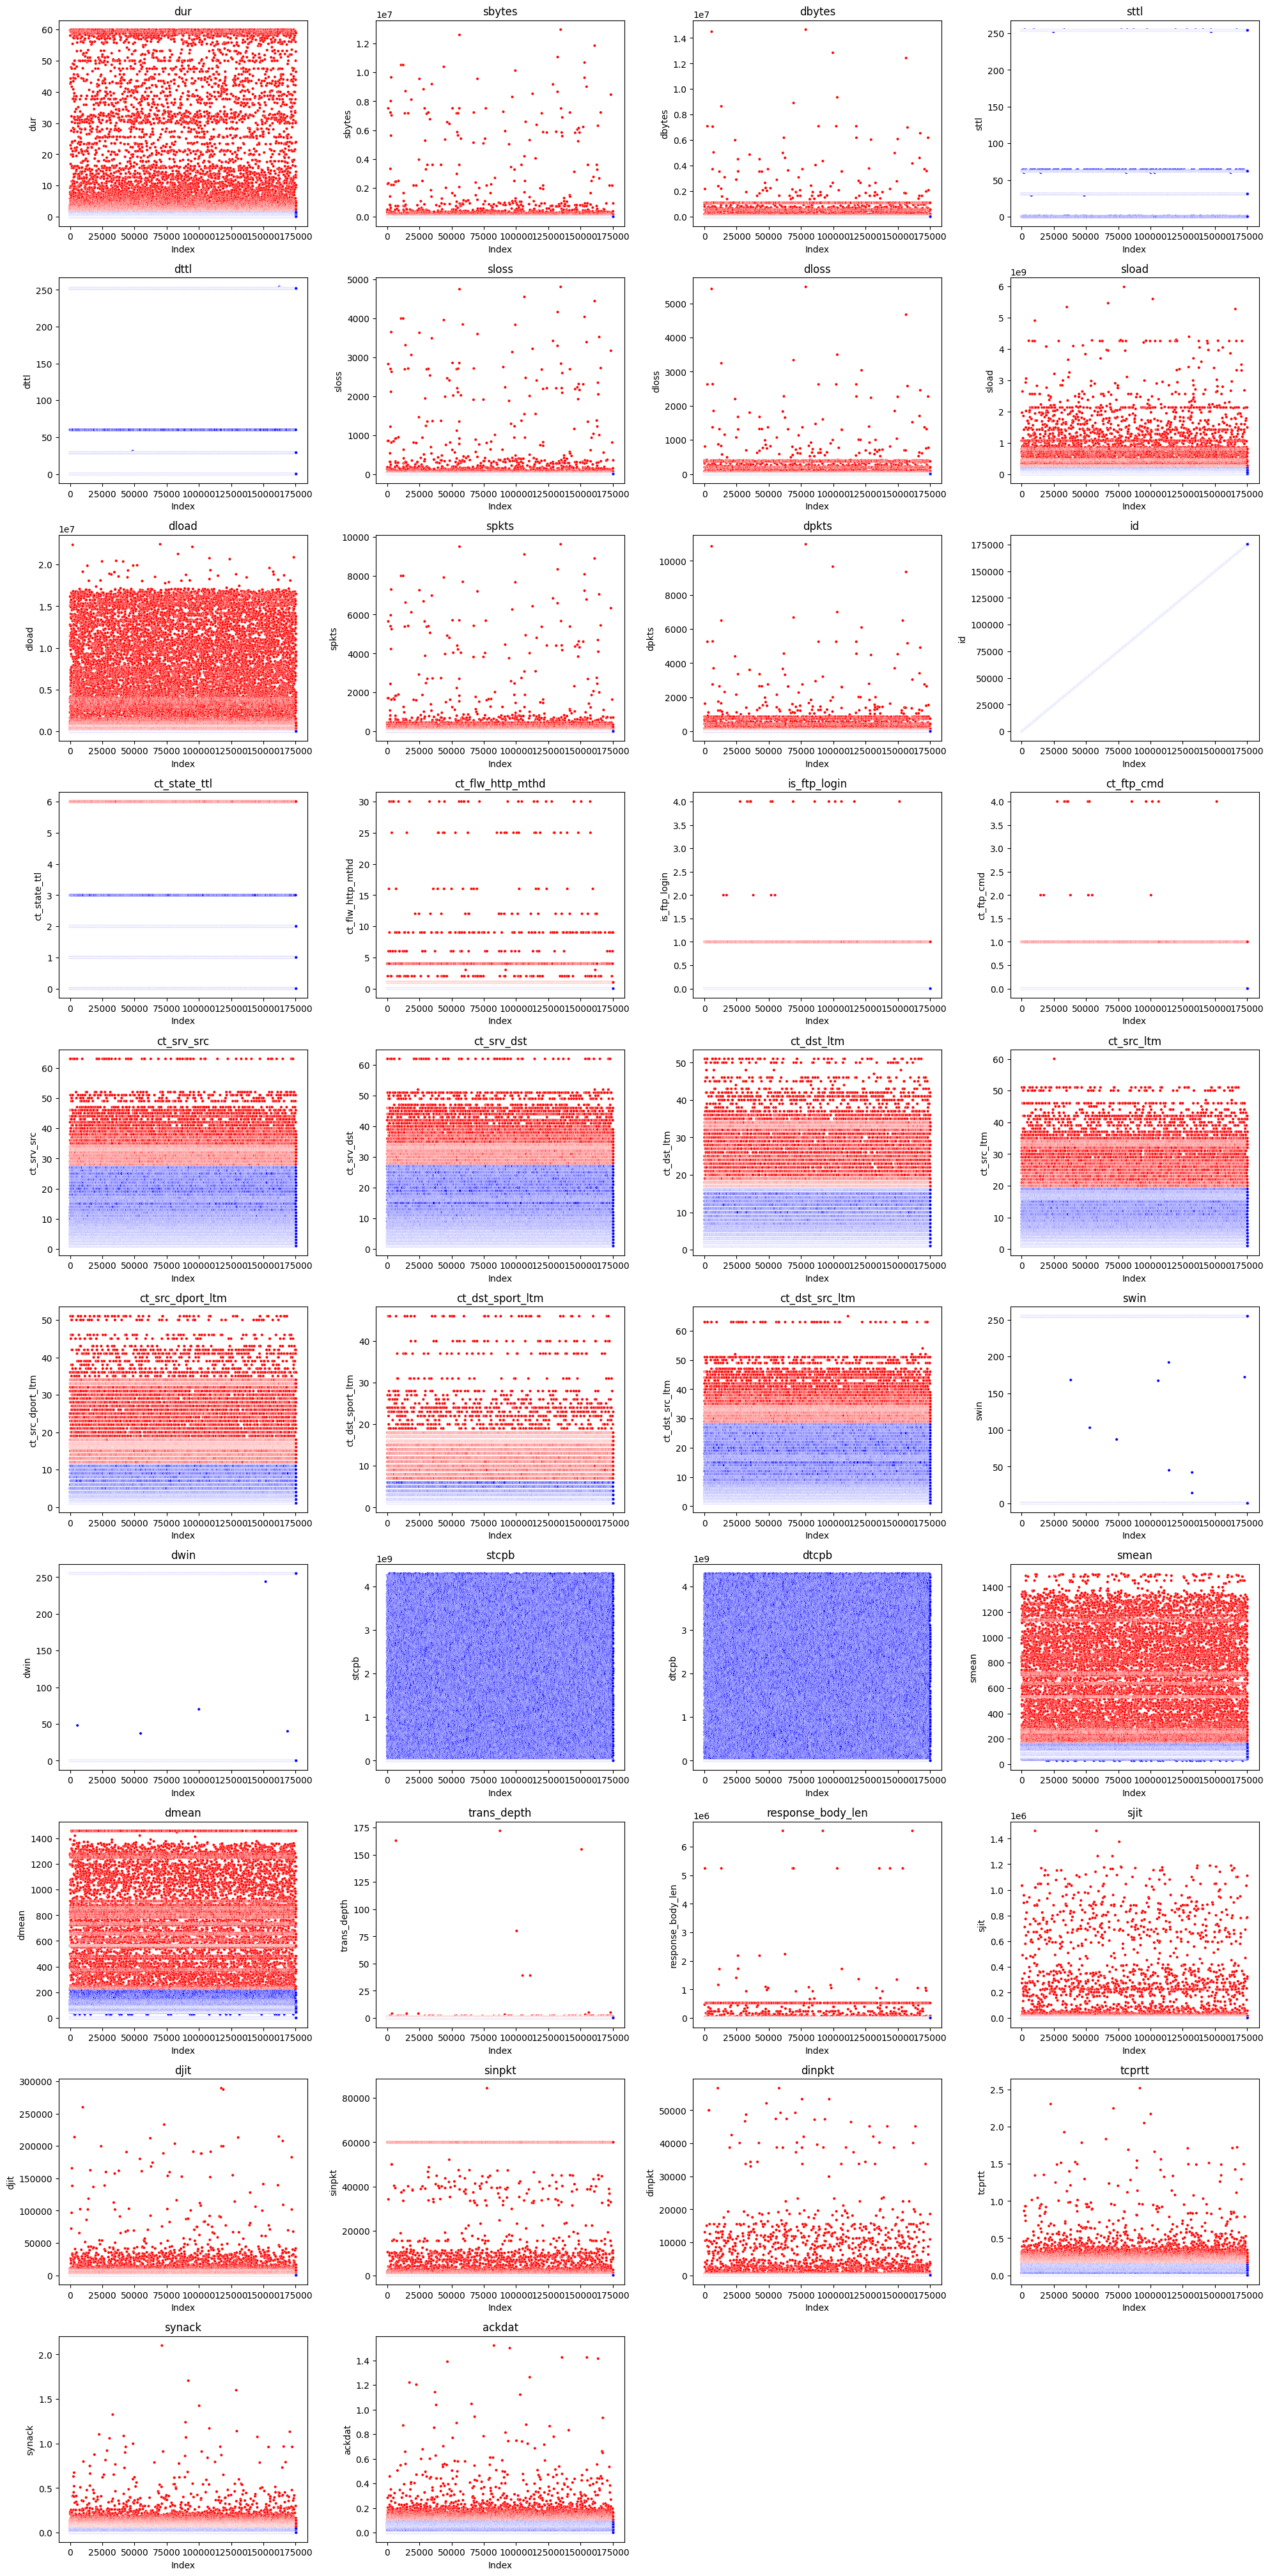

In [ ]:
# Find Outliers using Scatter Plot
# Note: Outlier is shown by the red color
plt.figure(figsize=(20, 44))
for i, col in enumerate(data_train.select_dtypes(include=['float64', 'int64']).columns):
    plt.subplot(11, 4, i+1)

    Q1 = data_train[col].quantile(0.25)
    Q3 = data_train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (data_train[col] < lower_bound) | (data_train[col] > upper_bound)

    sns.scatterplot(x=data_train.index, y=data_train[col], hue=outliers, palette={True: 'red', False: 'blue'}, legend=False, s=10)

    plt.xlabel('Index')
    plt.ylabel(col)

    plt.title(col)

plt.tight_layout()
plt.show()

### Data Insight

#### 1. Seberapa banyak data yang missing dibandingkan dengan jumlah total data pada setiap atribut dan korelasinya antar atribut

<ipython-input-21-7a7bc322cbdf>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_percent, y=missing_percent.index, palette='coolwarm')


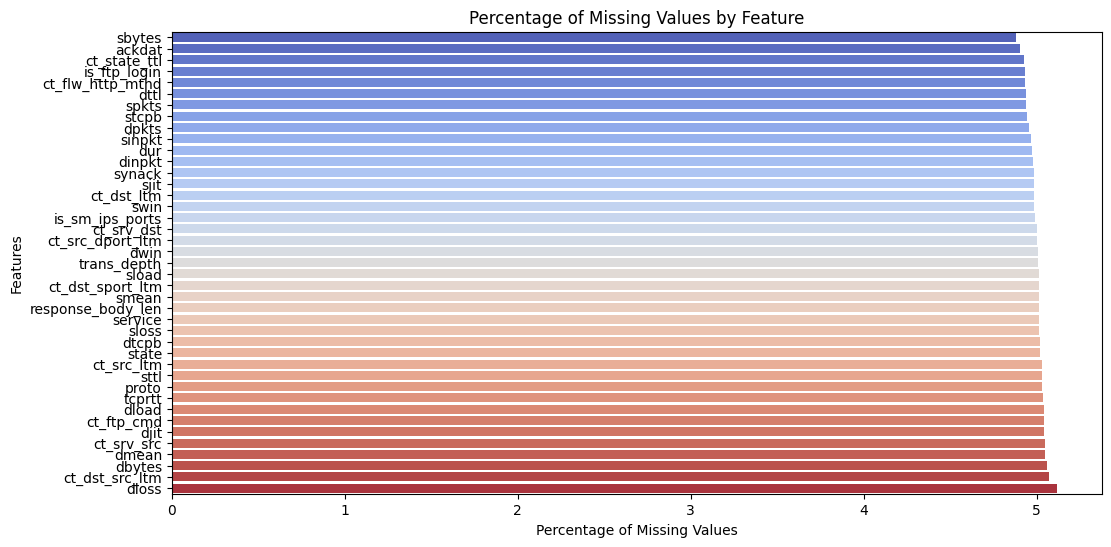

In [ ]:
# Menghitung persentase data yang missing
missing_percent = (data_train.isnull().sum() / len(data_train)) * 100

# Visualisasi
missing_percent = missing_percent[missing_percent > 0].sort_values()
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_percent, y=missing_percent.index, palette='coolwarm')
plt.xlabel("Percentage of Missing Values")
plt.ylabel("Features")
plt.title("Percentage of Missing Values by Feature")
plt.show()


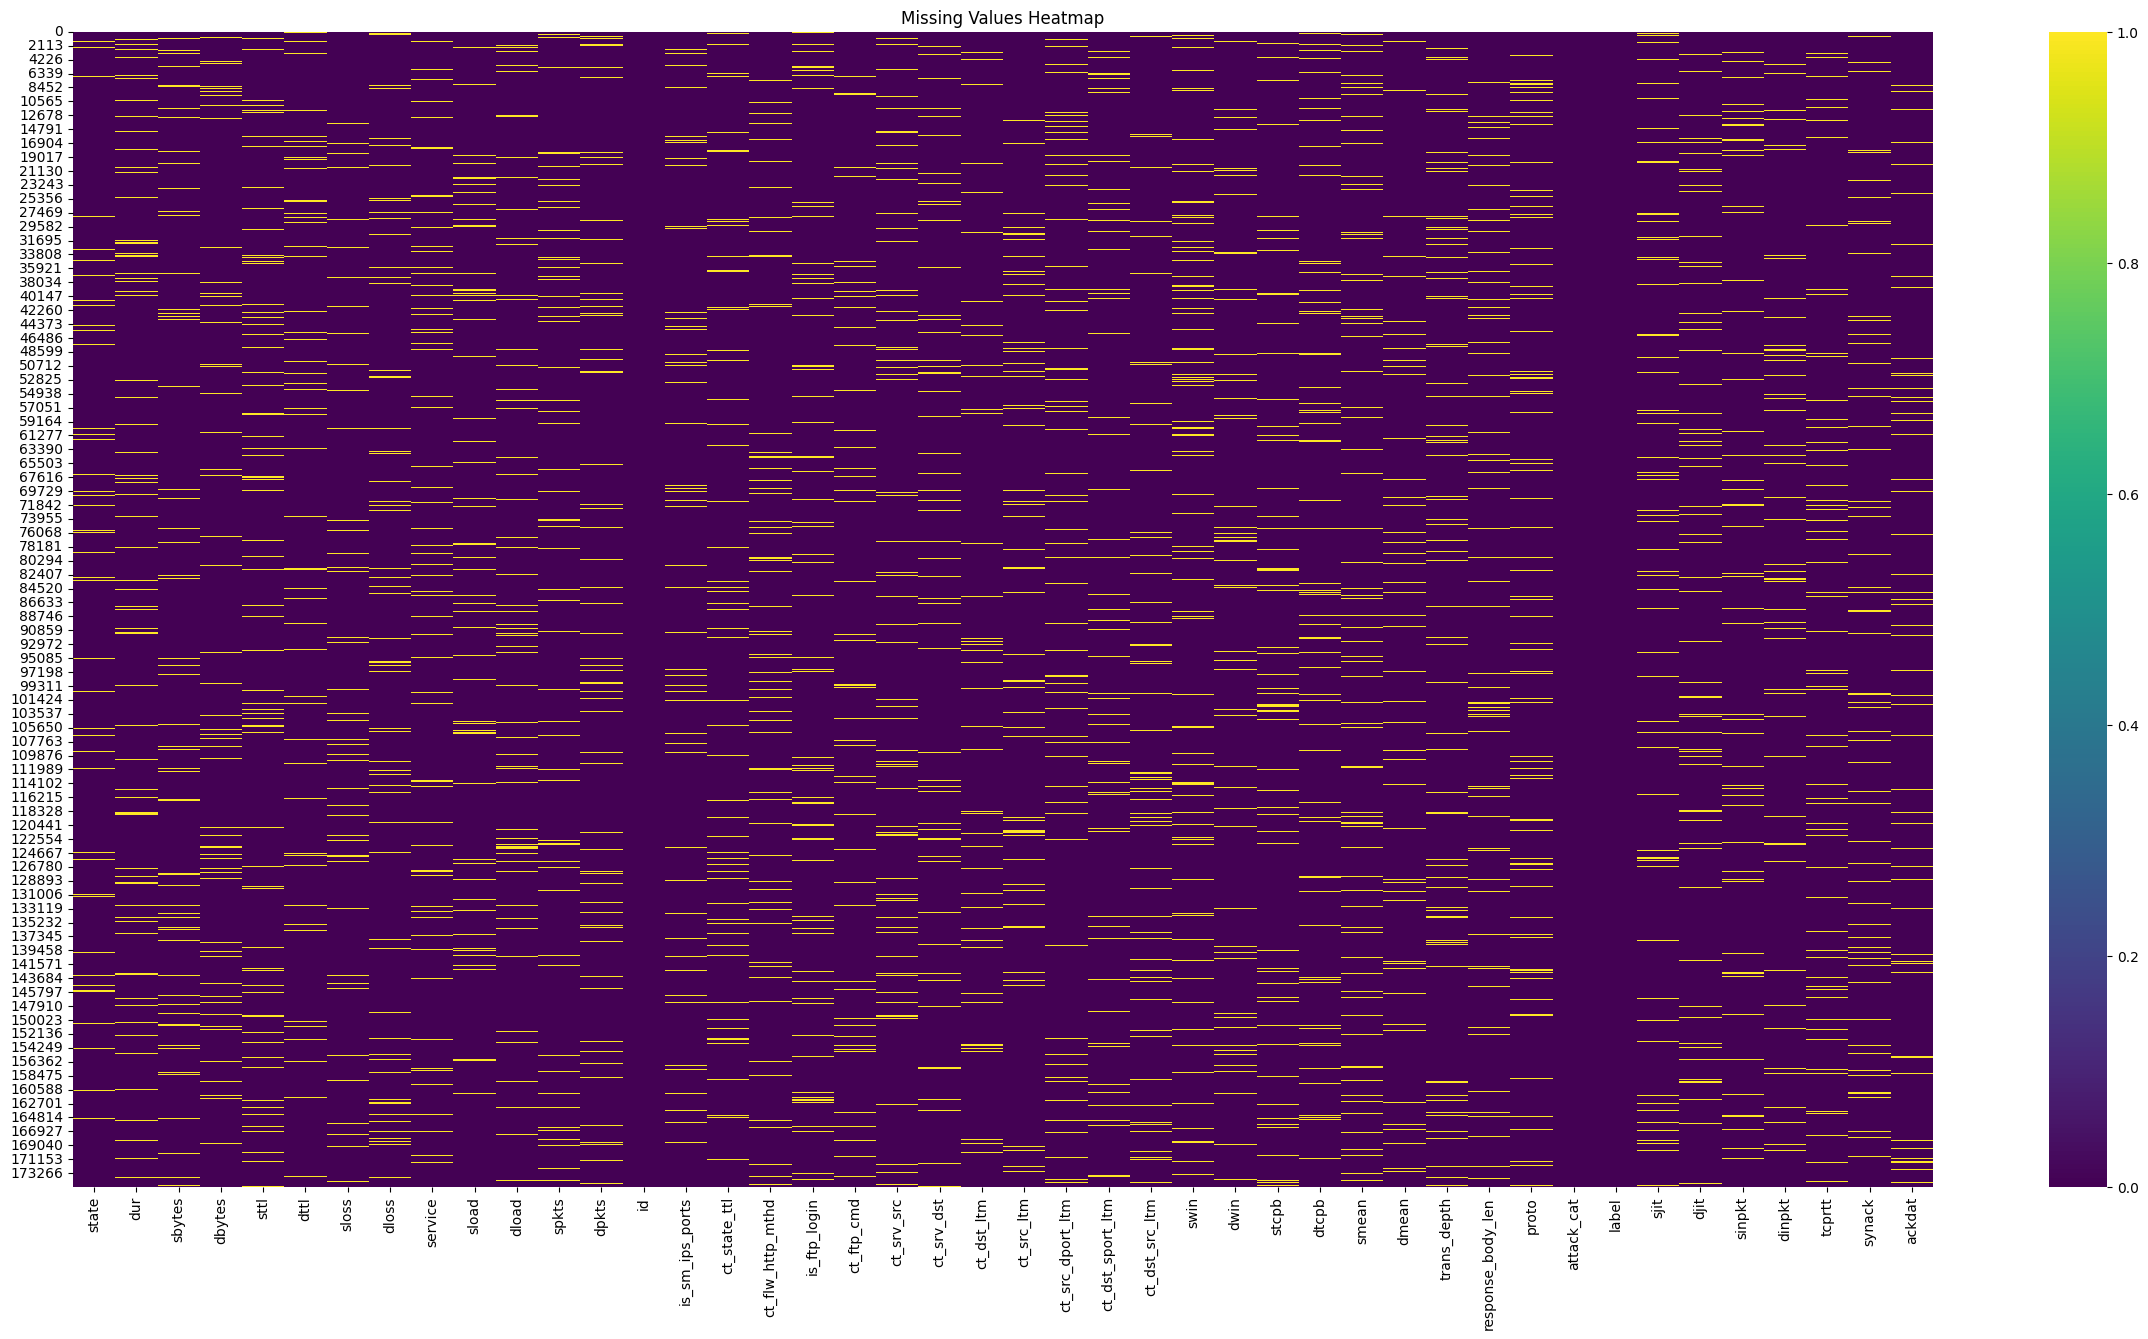

In [ ]:
# Missing values hitmap
plt.figure(figsize=(30, 15))
sns.heatmap(data_train.isnull(), cbar=True, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


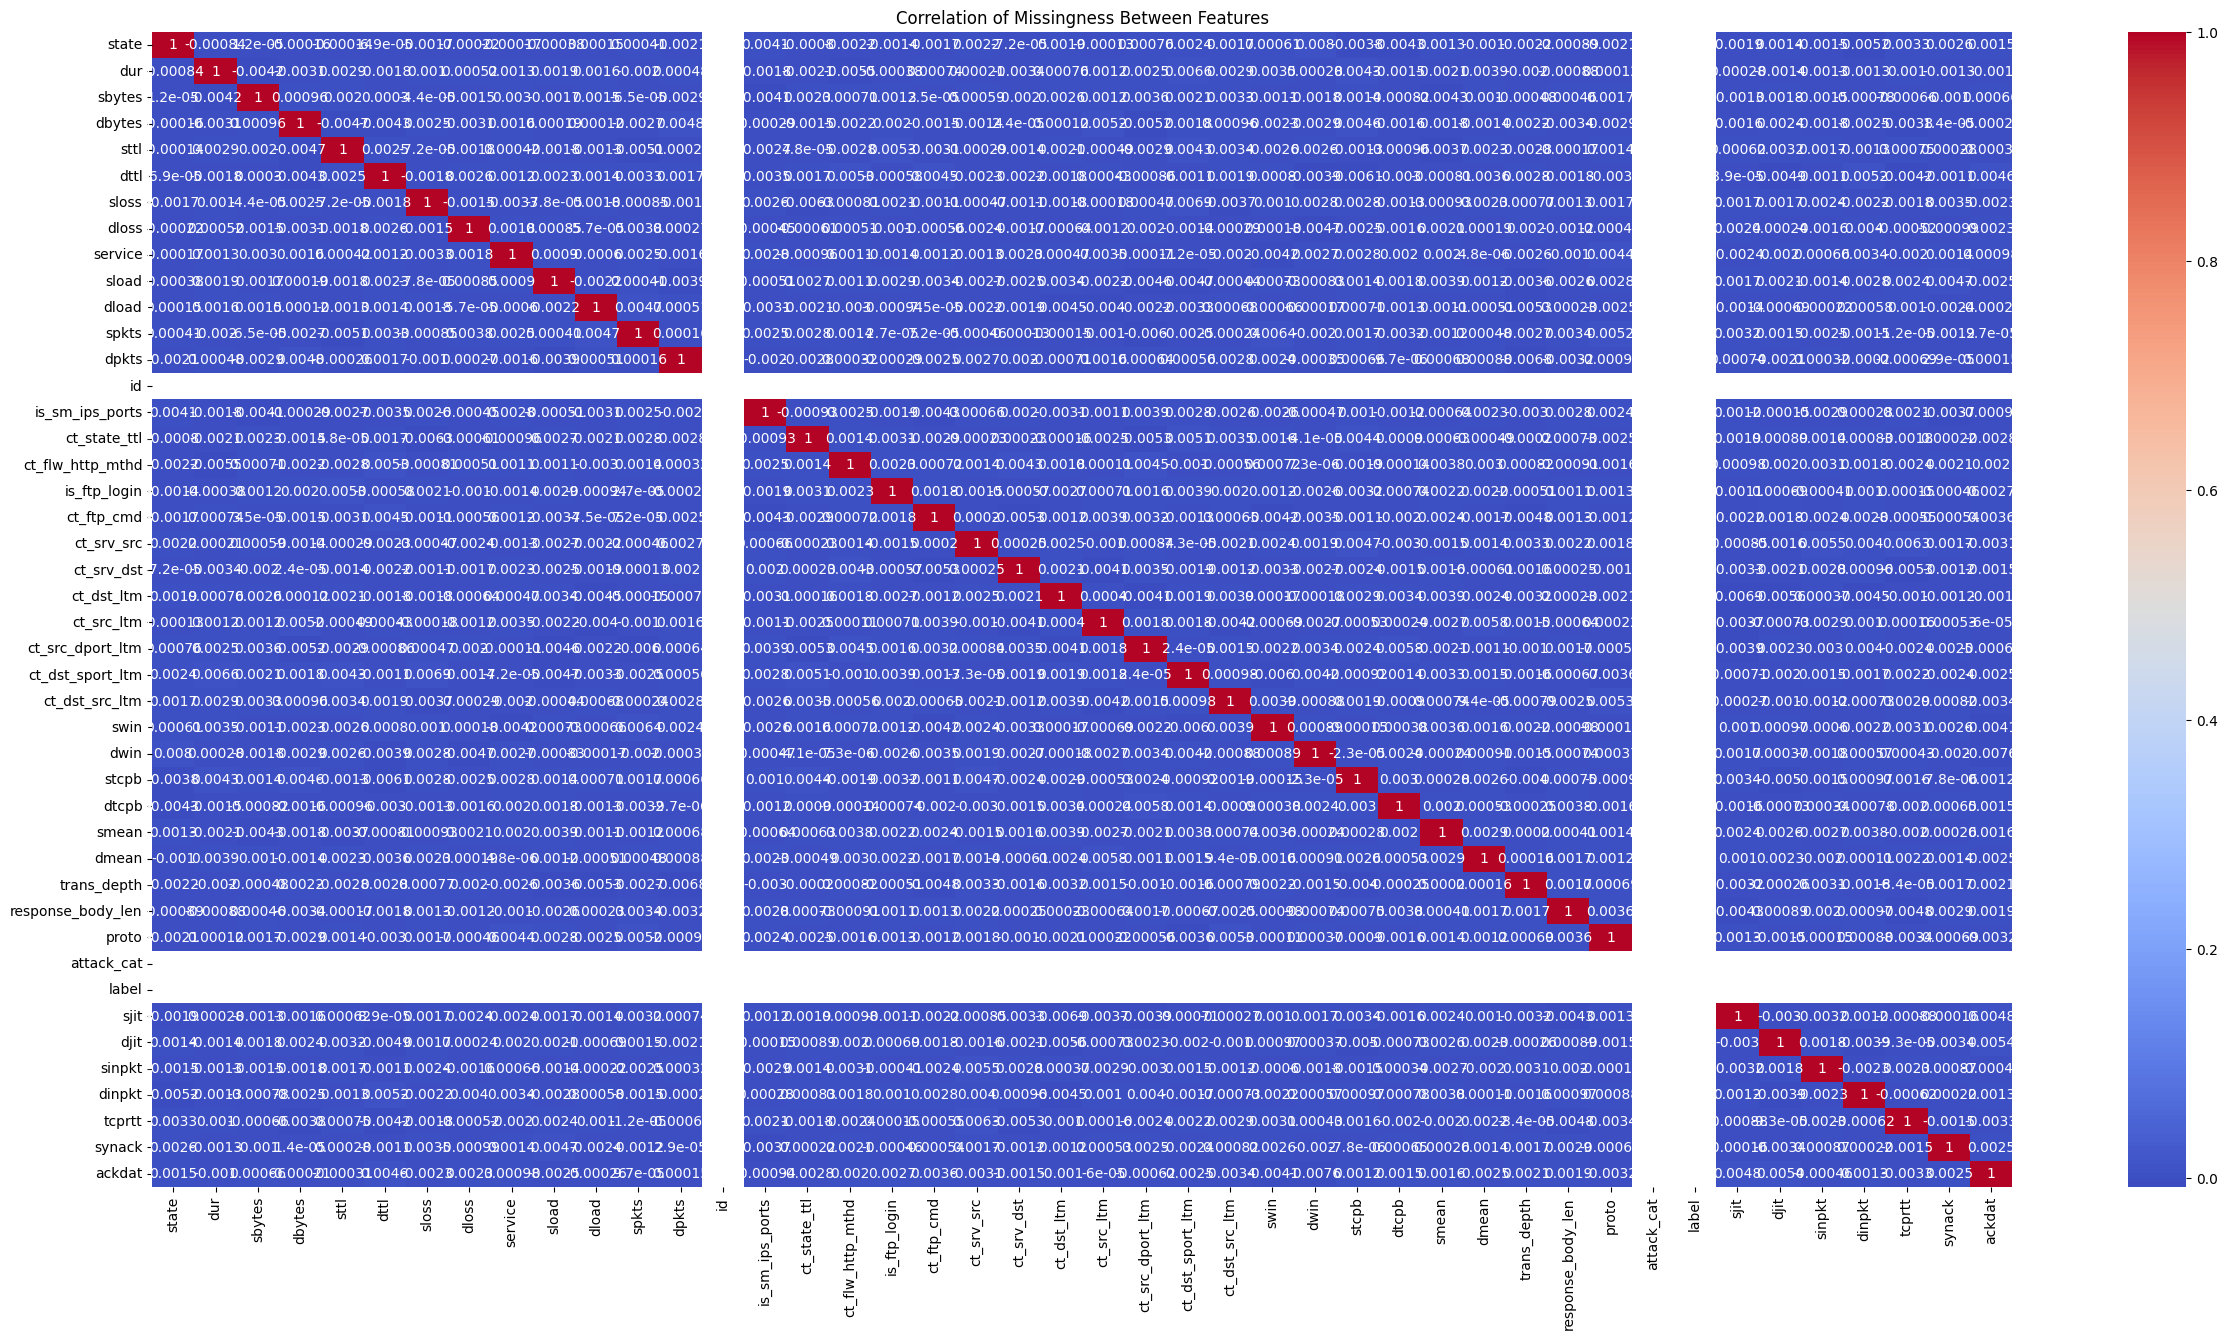

In [ ]:
# Mencari korelasi antar data yang terdapat missing value
missing_corr = data_train.isnull().corr()

# Correllation heatmap based on missing value
plt.figure(figsize=(30, 15))
sns.heatmap(missing_corr, annot=True, cmap="coolwarm")
plt.title("Correlation of Missingness Between Features")
plt.show()


##### Analisis

Dari tabel-tabel diatas dapat dilihat bahwa pertama banyak data yang missing < 5% dari data total, kedua bahwa distribusi data yang missing itu cukup tersebar dan tidak ada korelasi besar antar data yang missing. Dari kedua hal tersebut disimpulkan bahwa tidak ada pattern tertentu dari data yang missing dan mengindikasikan bahwa data itu MCAR. Karena data kemungkinan besar MCAR penggunaan teknik Data Imputasi dengan mean/median dapat dipertimbangkan.

#### 2. Berapa banyak jumlah data outlier dibandingkan data normal dan Apakah ada korelasi antara data outlier suatu atribut dengan attack_cat




In [ ]:
# Menyaring atribut numerik
numerical_columns = data_train.select_dtypes(include=['float64', 'int64']).columns

# DataFrame untuk menyimpan hasil persentase outlier
outlier_summary = pd.DataFrame(columns=['Atribut', 'Persentase Outlier'])

# Perulangan untuk setiap atribut numerik
for col in numerical_columns:
    # Hitung Q1, Q3, dan IQR
    Q1 = data_train[col].quantile(0.25)
    Q3 = data_train[col].quantile(0.75)
    IQR = Q3 - Q1

    # Identifikasi data outlier
    outliers = data_train[(data_train[col] < (Q1 - 1.5 * IQR)) |
                          (data_train[col] > (Q3 + 1.5 * IQR))]

    # Hitung jumlah data
    jumlah_outlier = len(outliers)
    jumlah_total = len(data_train)

    # Hitung persentase outlier
    persentase_outlier = (jumlah_outlier / jumlah_total) * 100

    # Simpan hasil ke DataFrame
    outlier_summary = pd.concat([outlier_summary,
                                 pd.DataFrame({
                                     'Atribut': [col],
                                     'Persentase Outlier': [persentase_outlier]
                                 })], ignore_index=True)
# Tampilkan hasil
print(outlier_summary)


<ipython-input-24-fa64574671bd>:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  outlier_summary = pd.concat([outlier_summary,


              Atribut  Persentase Outlier
0                 dur            8.536509
1              sbytes           12.410104
2              dbytes           15.226330
3                sttl            0.000000
4                dttl            0.000000
5               sloss            6.204482
6               dloss           15.396285
7               sload            7.324585
8               dload           20.606704
9               spkts           13.385346
10              dpkts           11.264907
11                 id            0.000000
12       ct_state_ttl            1.048243
13   ct_flw_http_mthd            9.693112
14       is_ftp_login            1.393285
15         ct_ftp_cmd            1.393285
16         ct_srv_src           10.481861
17         ct_srv_dst           10.482431
18         ct_dst_ltm           11.988639
19         ct_src_ltm            7.121552
20   ct_src_dport_ltm           18.136659
21   ct_dst_sport_ltm           20.180677
22     ct_dst_src_ltm            9

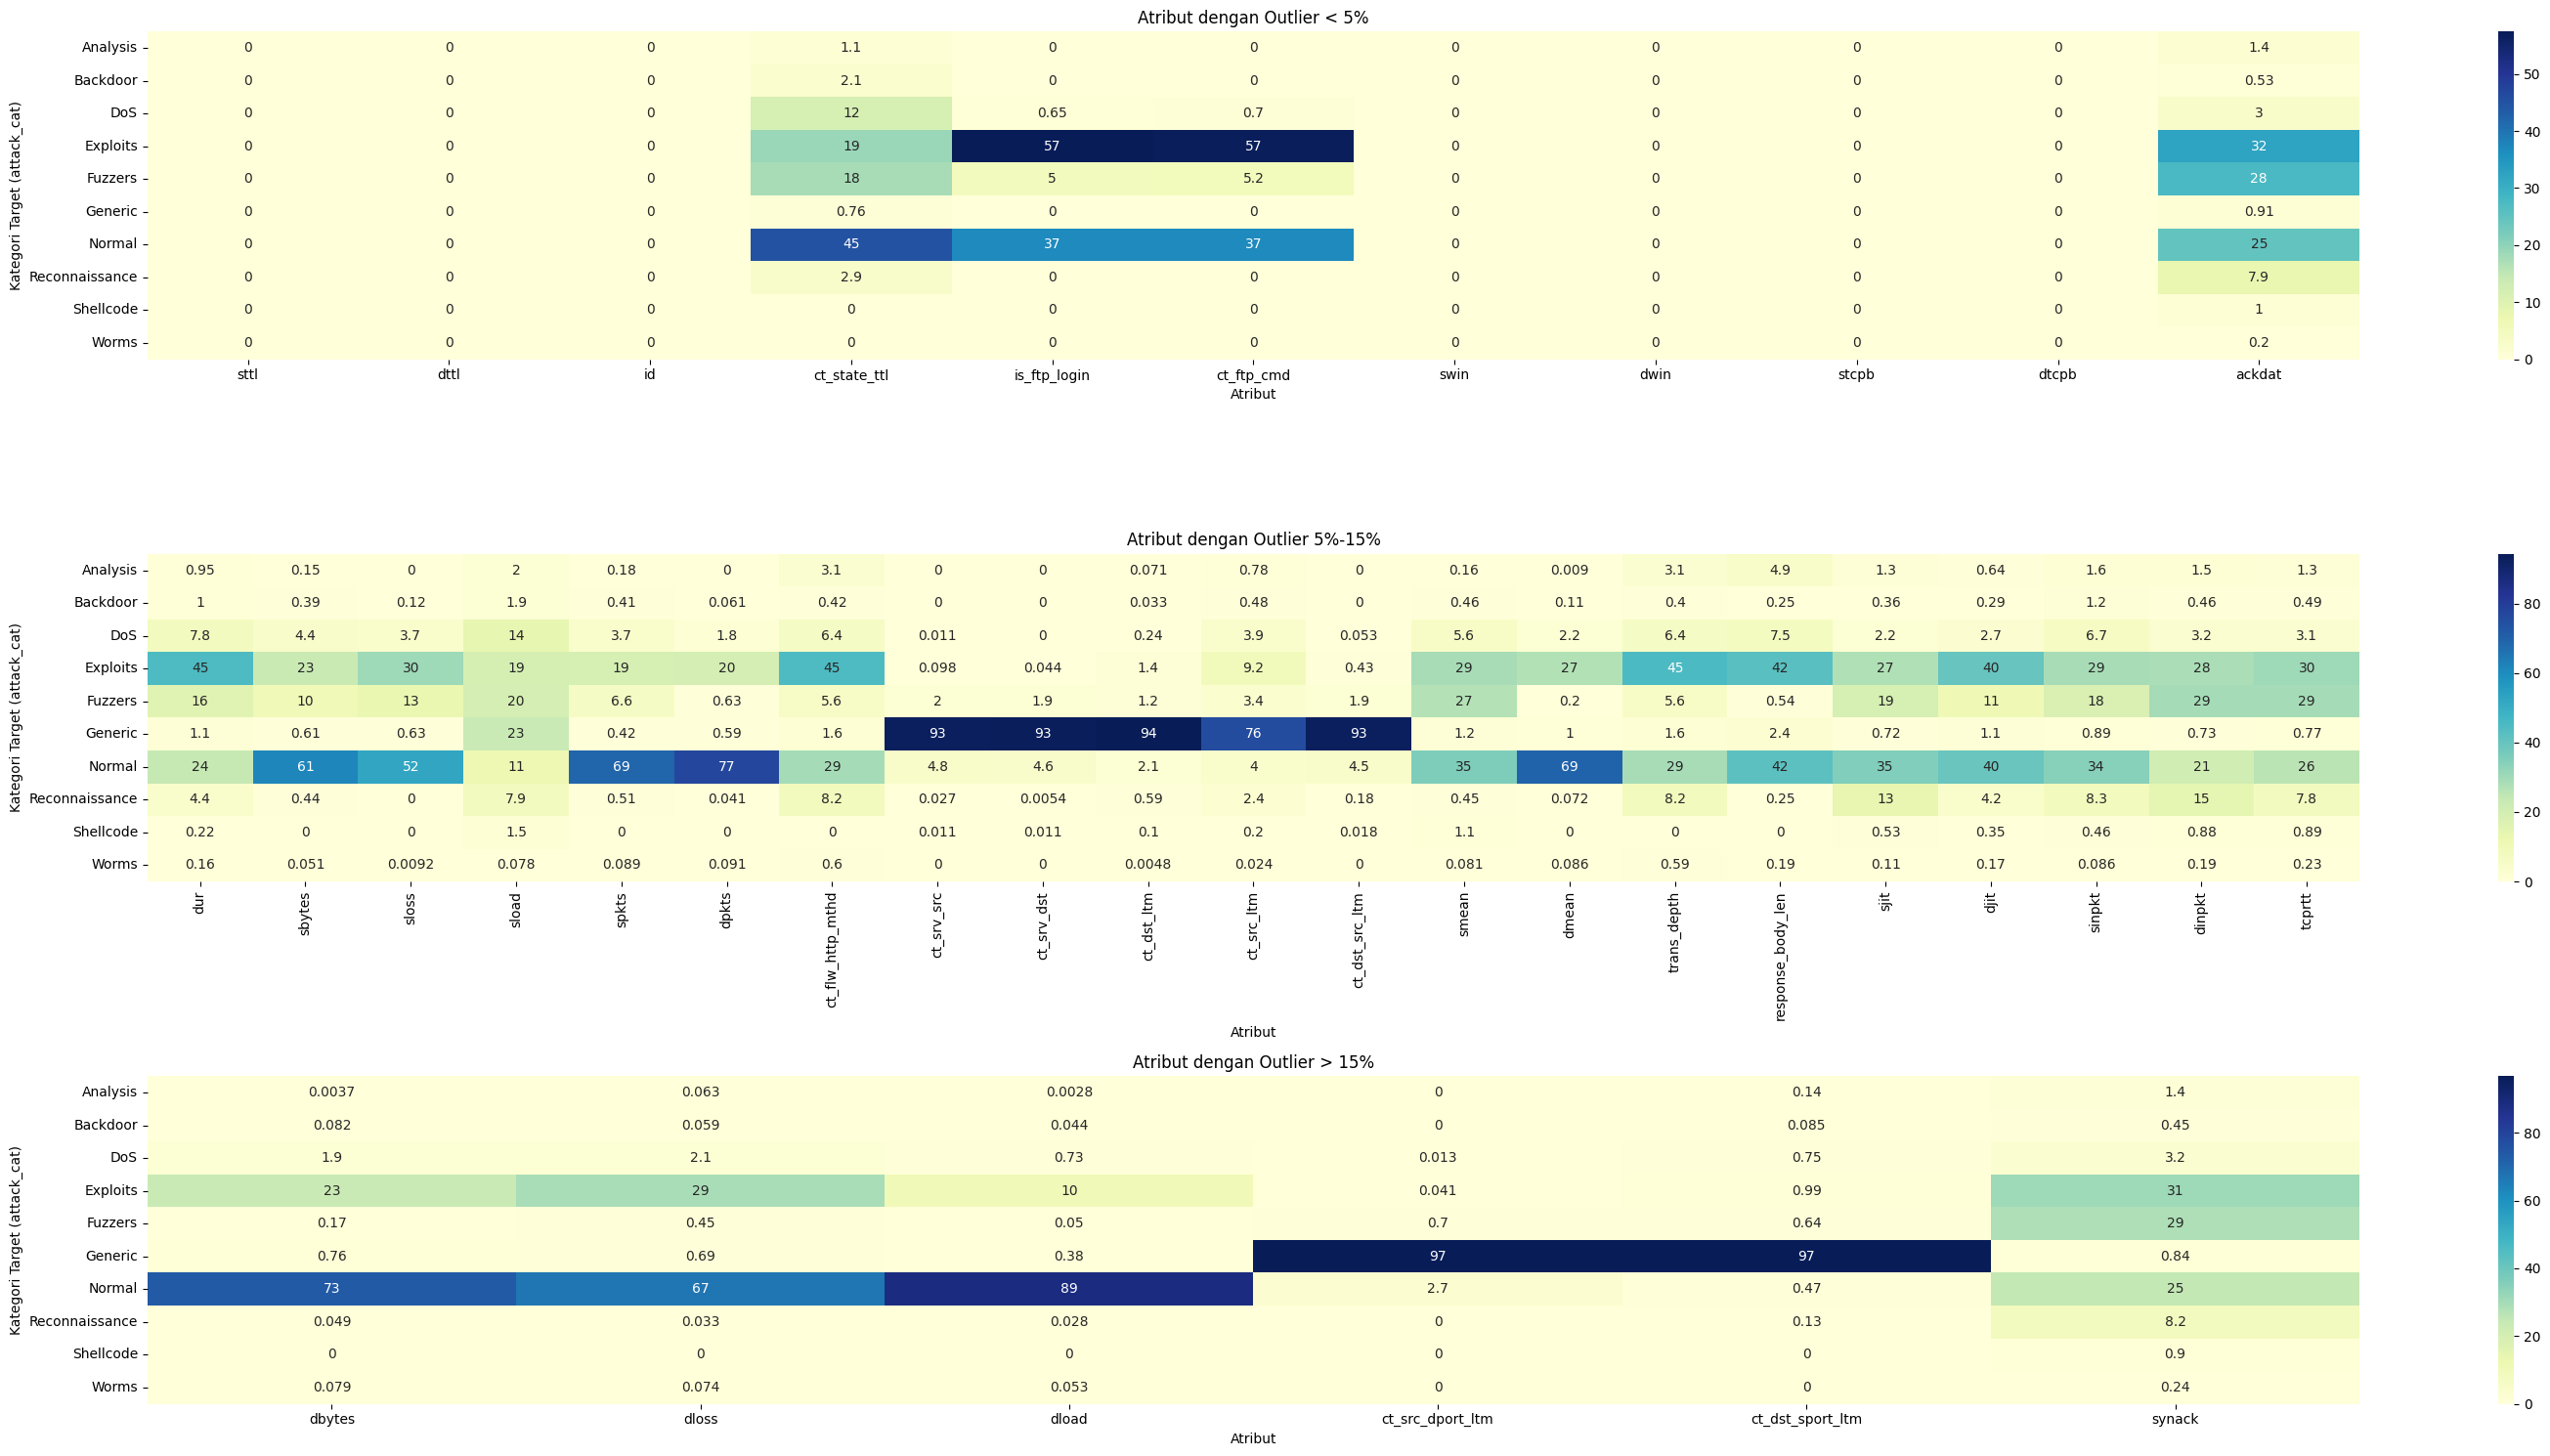

In [ ]:
# Get only numerics column
numerical_columns = data_train.select_dtypes(include=['float64', 'int64']).columns

# DataFrame untuk menyimpan persentase outlier berdasarkan attack_cat
outlier_percentages = pd.DataFrame()
outlier_ratios = {}

for col in numerical_columns:
    Q1 = data_train[col].quantile(0.25)
    Q3 = data_train[col].quantile(0.75)
    IQR = Q3 - Q1

    # Identifikasi data outlier
    outliers = data_train[(data_train[col] < (Q1 - 1.5 * IQR)) |
                          (data_train[col] > (Q3 + 1.5 * IQR))]

    # Hitung persentase total outlier untuk atribut ini
    outlier_ratio = len(outliers) / len(data_train) * 100
    outlier_ratios[col] = outlier_ratio

    # Hitung frekuensi outlier berdasarkan kategori attack_cat
    freq_outliers = outliers.groupby('attack_cat')[col].count()

    # Hitung total data per kategori attack_cat
    total_outliers = len(outliers)

    # Hitung persentase outlier untuk setiap kategori attack_cat
    percentage_outliers = (freq_outliers / total_outliers) * 100

    # Simpan hasil ke DataFrame
    outlier_percentages[col] = percentage_outliers

# Mengganti NaN dengan 0
outlier_percentages = outlier_percentages.fillna(0)

# Kategorikan atribut berdasarkan persentase total outlier
low_range = [col for col, ratio in outlier_ratios.items() if ratio < 5]
mid_range = [col for col, ratio in outlier_ratios.items() if 5 <= ratio <= 15]
high_range = [col for col, ratio in outlier_ratios.items() if ratio > 15]

# Buat heatmap untuk masing-masing kategori
plt.figure(figsize=(30, 15))

# Heatmap untuk atribut dengan persentase outlier < 5%
plt.subplot(3, 1, 1)
sns.heatmap(outlier_percentages[low_range], annot=True, cmap='YlGnBu', cbar=True)
plt.title('Atribut dengan Outlier < 5%')
plt.xlabel('Atribut')
plt.ylabel('Kategori Target (attack_cat)')

# Heatmap untuk atribut dengan persentase outlier 5%-15%
plt.subplot(3, 1, 2)
sns.heatmap(outlier_percentages[mid_range], annot=True, cmap='YlGnBu', cbar=True)
plt.title('Atribut dengan Outlier 5%-15%')
plt.xlabel('Atribut')
plt.ylabel('Kategori Target (attack_cat)')

# Heatmap untuk atribut dengan persentase outlier > 15%
plt.subplot(3, 1, 3)
sns.heatmap(outlier_percentages[high_range], annot=True, cmap='YlGnBu', cbar=True)
plt.title('Atribut dengan Outlier > 15%')
plt.xlabel('Atribut')
plt.ylabel('Kategori Target (attack_cat)')

plt.tight_layout()
plt.show()



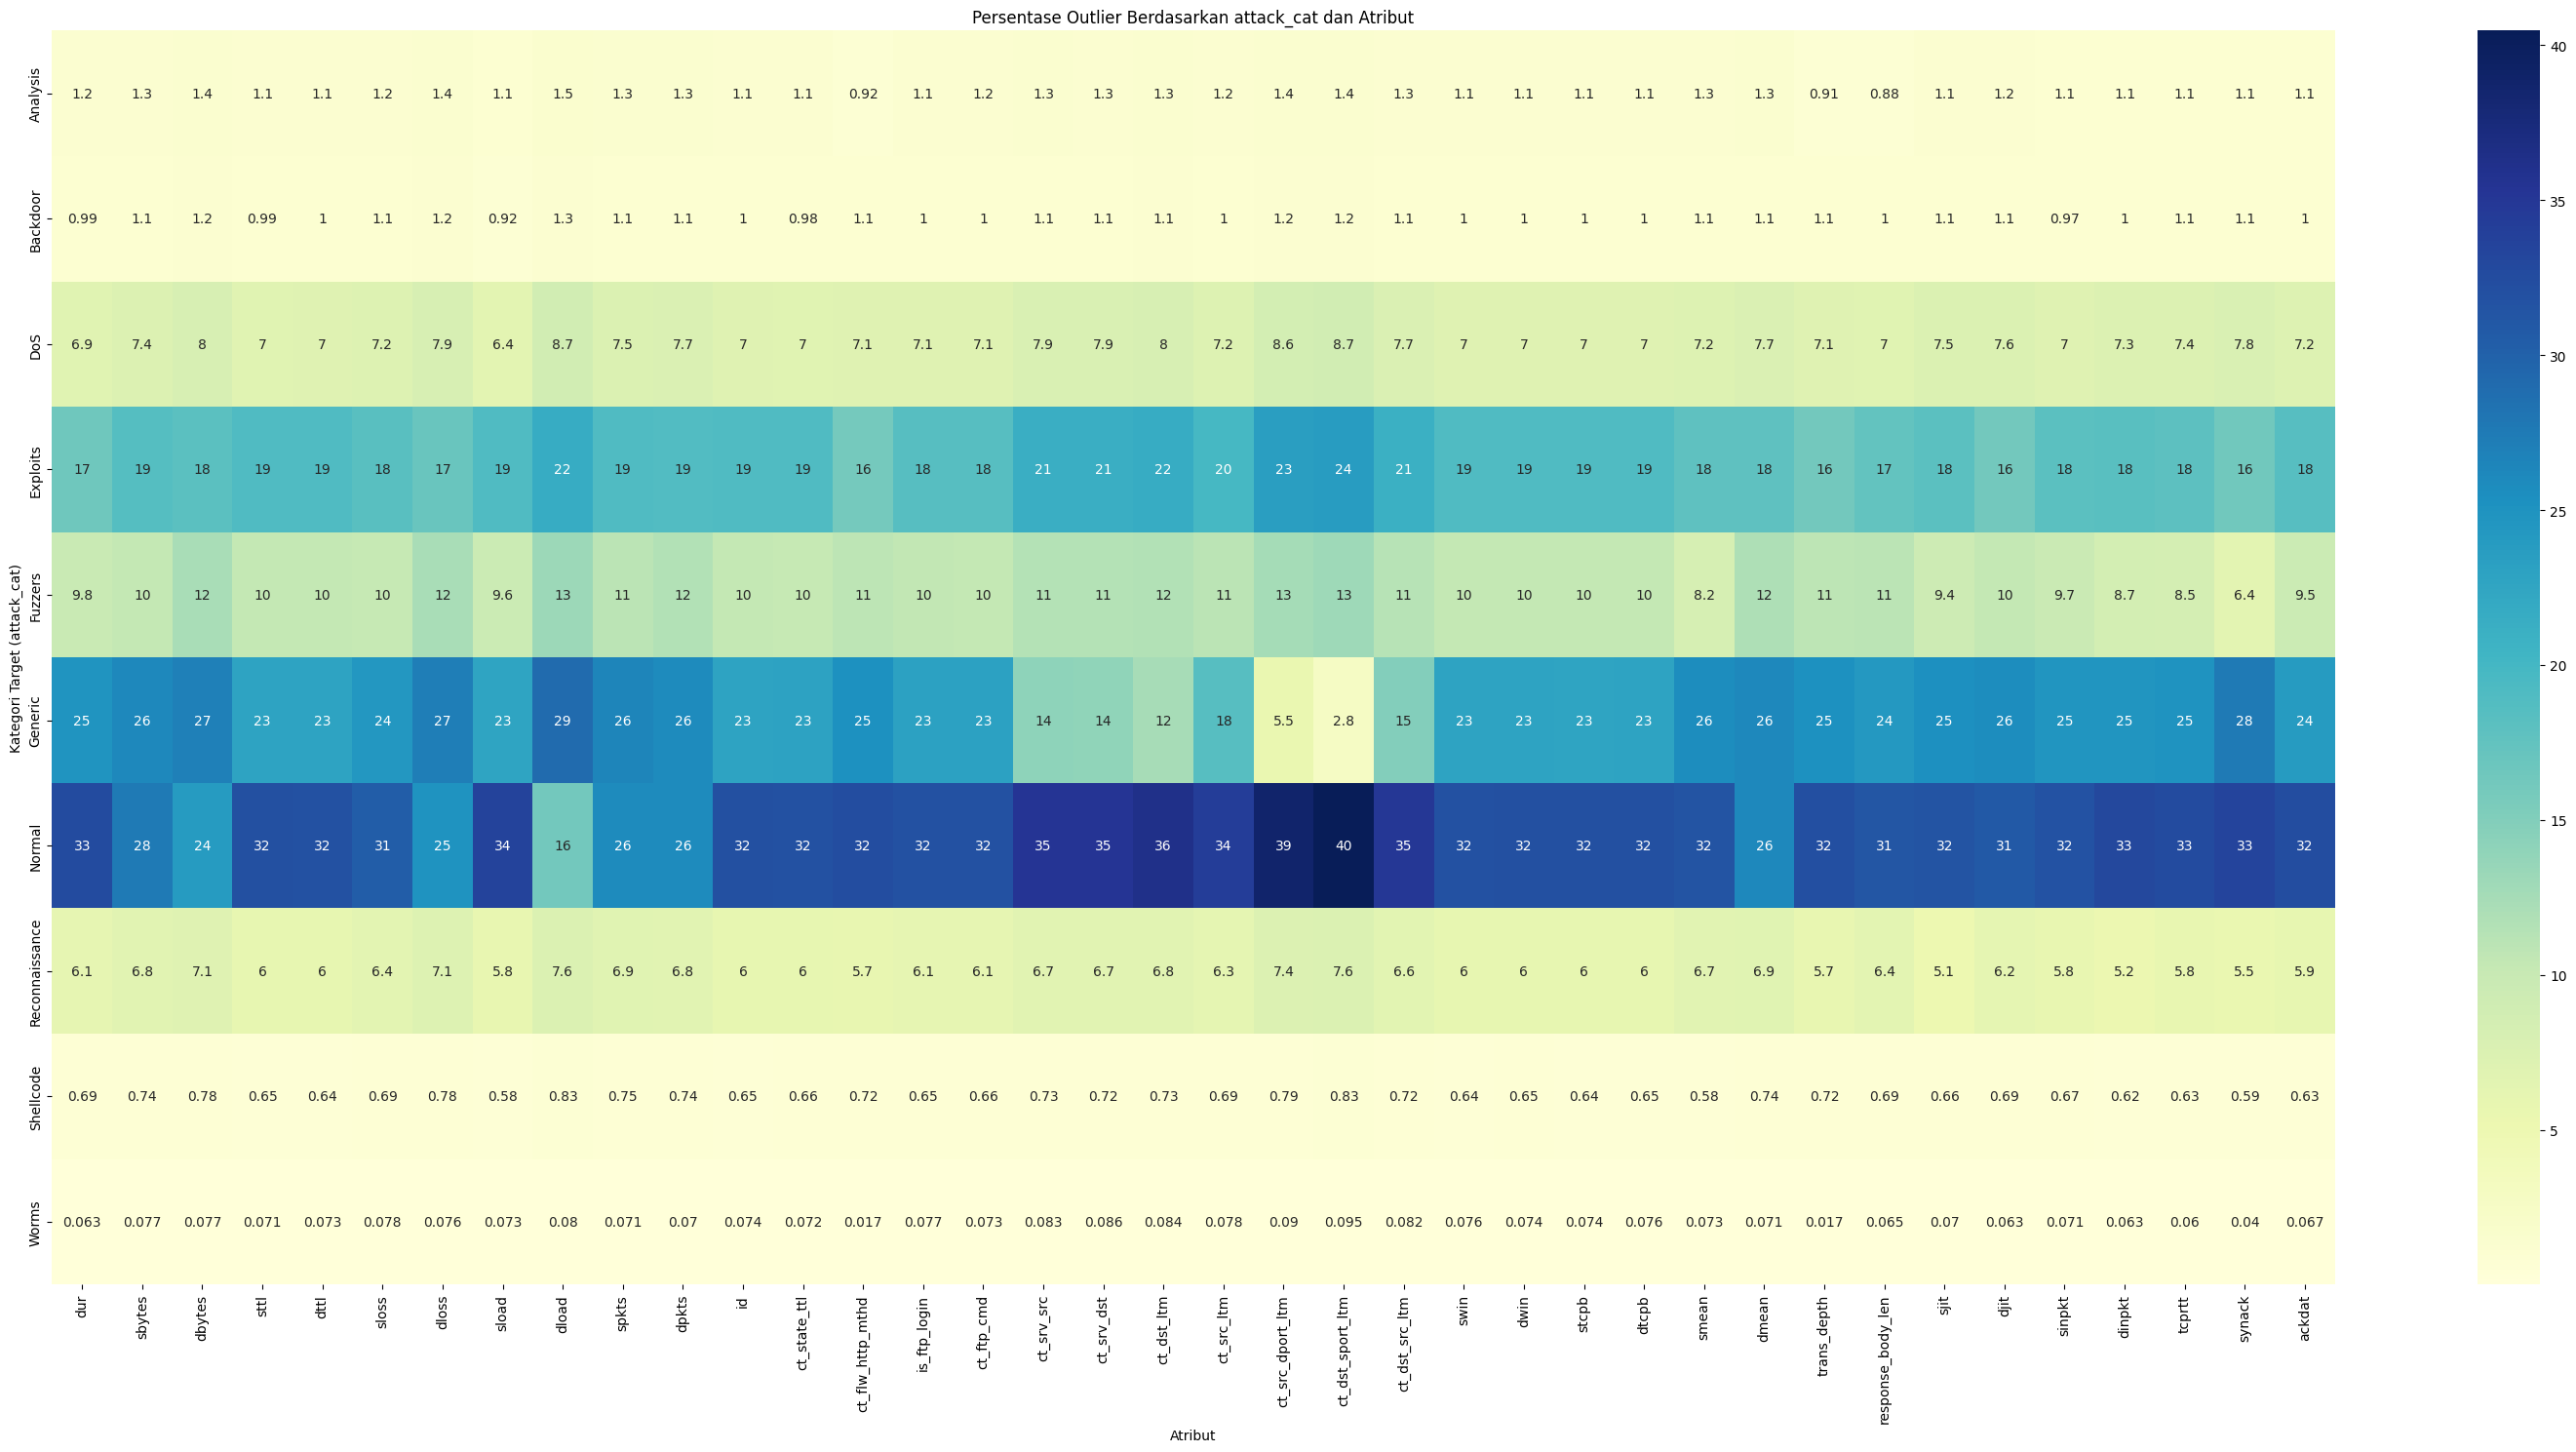

In [ ]:
numerical_columns = data_train.select_dtypes(include=['float64', 'int64']).columns

# DataFrame untuk menyimpan persentase outlier
outlier_percentages = pd.DataFrame()

for col in numerical_columns:
    Q1 = data_train[col].quantile(0.25)
    Q3 = data_train[col].quantile(0.75)
    IQR = Q3 - Q1

    # Identifikasi data yang mengandung outlier pada atribut ini
    outliers = data_train[(data_train[col] >= (Q1 - 1.5 * IQR)) & (data_train[col] <= (Q3 + 1.5 * IQR))]

    # Hitung frekuensi outlier berdasarkan kategori attack_cat
    freq_outliers = outliers.groupby('attack_cat')[col].count()

    # Hitung total jumlah entri dalam setiap kategori attack_cat
    total_per_category = outliers[col].count()

    # Hitung persentase outlier
    percentage_outliers = (freq_outliers / total_per_category) * 100

    # Simpan hasil persentase dalam DataFrame
    outlier_percentages[col] = percentage_outliers

# Buat heatmap dari persentase outlier
plt.figure(figsize=(30, 15))
sns.heatmap(outlier_percentages, annot=True, cmap='YlGnBu', cbar=True)

# Menambahkan judul dan label
plt.title('Persentase Outlier Berdasarkan attack_cat dan Atribut')
plt.xlabel('Atribut')
plt.ylabel('Kategori Target (attack_cat)')
plt.tight_layout()
plt.show()


##### Analysis

Dapat dilihat dari ke 3 heatmap diatas bahwa:



1. Kebanyakan dari data yang memiliki salah satu atributnya atau lebih outlier adalah attack_cat normal,generic, dan exploits. Namun hal tersebut masih konsisten dengan distribusi untuk data yang non-outlier yang mana mereka juga kebanyakan adalah attack_cat normal,generic, dan exploits. Maka masih belum bisa ditentukan apakah nilai outlier secara umum memberikan dampak signifikan terhadap attack_cat.

2. Dapat dilihat persentase Outlier cukup variatif dari 0 hingga >15%, penggunaan metode penanganan outlier yang berbeda berdasarkan atributnya dan mungkin ada yang dapat disimpan apabila outlier tersebut penting.

  * 0-5%	Pertahankan data. Lakukan verifikasi jika outlier penting.
  * 5-15%	Imputasi dengan median atau boundary value.
  * 15%<	Transformasi (log atau square root) atau model robust.

3. Ada beberapa atribut yang memiliki korelasi cukup tinggi >75% terhadap suatu attack_cat, hal tersebut dapat mengindikasi bahwa nilai outlier tersebut penting untuk menentukan attack_cat yang berkaitan. Maka membiarkan atribut-atribut tersebut tidak dimodifikasi dapat meningkatkan performa model. Testing lebih lanjut akan diperlukan.

#### 1. What are the most common protocols (proto) in the dataset, and are certain protocols more associated with specific attack categories?

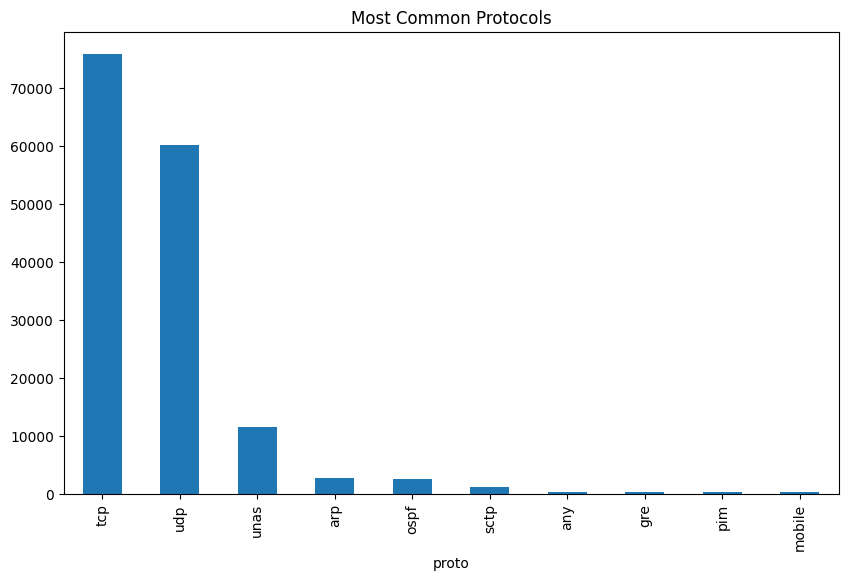

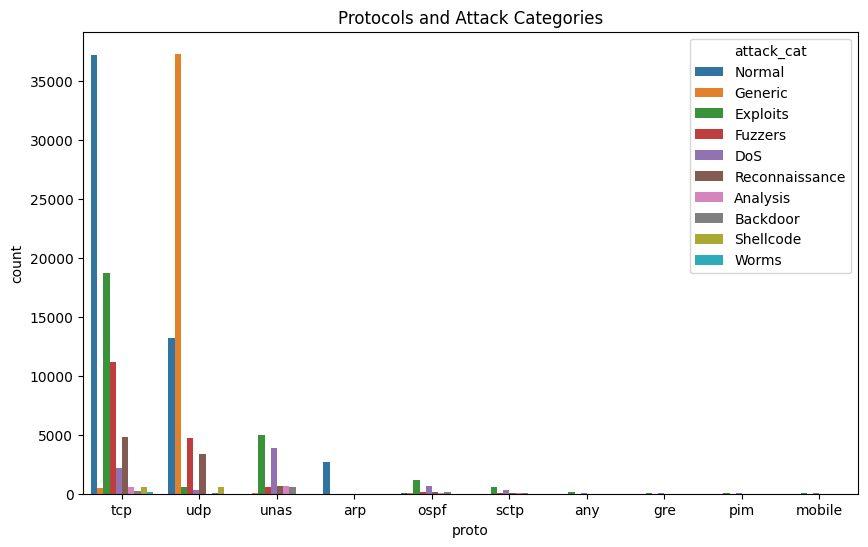

In [ ]:
# Most Common Protocols
plt.figure(figsize=(10,6))
data_train['proto'].value_counts().head(10).plot(kind='bar')
plt.title("Most Common Protocols")
plt.show()

# Protocols and Attack
plt.figure(figsize=(10,6))
sns.countplot(x='proto', hue='attack_cat', data=data_train, order=data_train['proto'].value_counts().head(10).index)
plt.title("Protocols and Attack Categories")
plt.show()

Protocol yang paling sering digunakan adalah protocol tcp

* Attack yang paling sering digunakan untuk menyerang protocol tcp adalah exploits attack
* Attack yang paling sering digunakan untuk menyerang protocol udp adalah generic attack
* Attack yang paling sering digunakan untuk menyerang protocol unas adalah exploits attack
* Protocol Arp tidak mengalami serangan sama sekali
* Attack yang paling sering digunakan untuk menyerang protocol ospf adalah exploits attack
* Attack yang paling sering digunakan untuk menyerang protocol sctp adalah exploits attack

# 1. Split Training Set and Validation Set

Splitting the training and validation set works as an early diagnostic towards the performance of the model we train. This is done before the preprocessing steps to **avoid data leakage inbetween the sets**. If you want to use k-fold cross-validation, split the data later and do the cleaning and preprocessing separately for each split.

Note: For training, you should use the data contained in the `train` folder given by the TA. The `test` data is only used for kaggle submission.

In [ ]:
train_set, val_set = train_test_split(data_train, test_size=0.2, random_state=42)

print("Train Set Dimension : ")
print(f"instance (rows): ", {train_set.shape[0]})
print(f"features (columns): ", {train_set.shape[1]})

print("Validation Set Dimension : ")
print(f"instance (rows): ", {val_set.shape[0]})
print(f"features (columns): ", {val_set.shape[1]})


print(val_set['label'].value_counts())

x_train = train_set.drop(columns=['attack_cat'])
y_train = train_set['attack_cat']
y_train = y_train.squeeze()

x_val = val_set.drop(columns=['attack_cat'])
y_val = val_set['attack_cat']

# Categorical & Numerical Attributes
x_train_numeric = x_train.select_dtypes(include=["number"])
x_train_categorical = x_train.select_dtypes(exclude=["number"])

print("Numerical Attributes : ")
print(x_train_numeric.columns)
print("\n")

print("Categorical Attributes : ")
print(x_train_categorical.columns)
print("\n")

x_val_numeric = x_val.select_dtypes(include=["number"])
x_val_categorical = x_val.select_dtypes(exclude=["number"])

Train Set Dimension : 
instance (rows):  {140272}
features (columns):  {44}
Validation Set Dimension : 
instance (rows):  {35069}
features (columns):  {44}
label
1    23815
0    11254
Name: count, dtype: int64
Numerical Attributes : 
Index(['dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'sload',
       'dload', 'spkts', 'dpkts', 'id', 'is_sm_ips_ports', 'ct_state_ttl',
       'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src',
       'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm', 'ct_src_dport_ltm',
       'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'swin', 'dwin', 'stcpb', 'dtcpb',
       'smean', 'dmean', 'trans_depth', 'response_body_len', 'label', 'sjit',
       'djit', 'sinpkt', 'dinpkt', 'tcprtt', 'synack', 'ackdat'],
      dtype='object')


Categorical Attributes : 
Index(['state', 'service', 'proto'], dtype='object')




# 2. Data Cleaning and Preprocessing

This step is the first thing to be done once a Data Scientist have grasped a general knowledge of the data. Raw data is **seldom ready for training**, therefore steps need to be taken to clean and format the data for the Machine Learning model to interpret.

By performing data cleaning and preprocessing, you ensure that your dataset is ready for model training, leading to more accurate and reliable machine learning results. These steps are essential for transforming raw data into a format that machine learning algorithms can effectively learn from and make predictions.

We will give some common methods for you to try, but you only have to **at least implement one method for each process**. For each step that you will do, **please explain the reason why did you do that process. Write it in a markdown cell under the code cell you wrote.**

## A. Data Cleaning

**Data cleaning** is the crucial first step in preparing your dataset for machine learning. Raw data collected from various sources is often messy and may contain errors, missing values, and inconsistencies. Data cleaning involves the following steps:

1. **Handling Missing Data:** Identify and address missing values in the dataset. This can include imputing missing values, removing rows or columns with excessive missing data, or using more advanced techniques like interpolation.

2. **Dealing with Outliers:** Identify and handle outliers, which are data points significantly different from the rest of the dataset. Outliers can be removed or transformed to improve model performance.

3. **Data Validation:** Check for data integrity and consistency. Ensure that data types are correct, categorical variables have consistent labels, and numerical values fall within expected ranges.

4. **Removing Duplicates:** Identify and remove duplicate rows, as they can skew the model's training process and evaluation metrics.

5. **Feature Engineering**: Create new features or modify existing ones to extract relevant information. This step can involve scaling, normalizing, or encoding features for better model interpretability.

### I. Handling Missing Data

Missing data can adversely affect the performance and accuracy of machine learning models. There are several strategies to handle missing data in machine learning:

1. **Data Imputation:**

    a. **Mean, Median, or Mode Imputation:** For numerical features, you can replace missing values with the mean, median, or mode of the non-missing values in the same feature. This method is simple and often effective when data is missing at random.

    b. **Constant Value Imputation:** You can replace missing values with a predefined constant value (e.g., 0) if it makes sense for your dataset and problem.

    c. **Imputation Using Predictive Models:** More advanced techniques involve using predictive models to estimate missing values. For example, you can train a regression model to predict missing numerical values or a classification model to predict missing categorical values.

2. **Deletion of Missing Data:**

    a. **Listwise Deletion:** In cases where the amount of missing data is relatively small, you can simply remove rows with missing values from your dataset. However, this approach can lead to a loss of valuable information.

    b. **Column (Feature) Deletion:** If a feature has a large number of missing values and is not critical for your analysis, you can consider removing that feature altogether.

3. **Domain-Specific Strategies:**

    a. **Domain Knowledge:** In some cases, domain knowledge can guide the imputation process. For example, if you know that missing values are related to a specific condition, you can impute them accordingly.

4. **Imputation Libraries:**

    a. **Scikit-Learn:** Scikit-Learn provides a `SimpleImputer` class that can handle basic imputation strategies like mean, median, and mode imputation.

    b. **Fancyimpute:** Fancyimpute is a Python library that offers more advanced imputation techniques, including matrix factorization, k-nearest neighbors, and deep learning-based methods.

The choice of imputation method should be guided by the nature of your data, the amount of missing data, the problem you are trying to solve, and the assumptions you are willing to make.

In [ ]:
# Memisahkan kolom numerik dan kategorikal
data_train_numeric = x_train.select_dtypes(include=['number'])
data_train_categorical = x_train.select_dtypes(exclude=['number'])

# Menyimpan kolom 'id' sebelum melakukan imputasi karena tidak ada missing values di kolom id
id_column = data_train_numeric['id']

# Memisahkan numerik tanpa 'id' untuk diimpute
data_train_numeric_no_id = data_train_numeric.drop(columns=['id'])

# Imputasi median untuk numerik
median_imputer = SimpleImputer(strategy='median')
data_numeric_imputed = pd.DataFrame(
    median_imputer.fit_transform(data_train_numeric_no_id),
    columns=data_train_numeric_no_id.columns,
    index=data_train_numeric_no_id.index  # Menjaga indeks asli
)

# Menambahkan kembali kolom 'id'
data_numeric_imputed['id'] = id_column

# Imputasi most frequent untuk kategorikal
most_frequent_imputer = SimpleImputer(strategy='most_frequent')
data_categorical_imputed = pd.DataFrame(
    most_frequent_imputer.fit_transform(data_train_categorical),
    columns=data_train_categorical.columns,
    index=data_train_categorical.index  # Menjaga indeks asli
)


# Menggabungkan kembali numerik dan kategorikal
data_no_missing_values = pd.concat([data_numeric_imputed, data_categorical_imputed], axis=1)
print(data_numeric_imputed, data_categorical_imputed)
print(data_no_missing_values.shape)

# Menampilkan hasil
print(data_no_missing_values.head())

# Validasi Missing Values
missing_values = data_no_missing_values.isnull().sum()
print("Total missing values for each feature:")
print(missing_values)

             dur   sbytes  dbytes   sttl   dttl  sloss  dloss         sload  \
96203   0.778778    608.0   646.0  254.0  252.0    2.0    3.0  5.629332e+03   
58960   0.000009    200.0     0.0  254.0   29.0    0.0    0.0  8.888889e+07   
65069   0.000009    114.0     0.0  254.0    0.0    0.0    0.0  5.066666e+07   
64133   0.000008    114.0     0.0  254.0    0.0    0.0    0.0  5.700000e+07   
111445  0.627731    818.0  1062.0   62.0  252.0    2.0    2.0  9.392558e+03   
...          ...      ...     ...    ...    ...    ...    ...           ...   
119879  1.240960  10988.0   354.0  254.0  252.0    5.0    1.0  6.641310e+04   
103694  0.949207    564.0   354.0  254.0  252.0    2.0    1.0  4.281469e+03   
131932  0.000002    114.0   162.0  254.0    0.0    0.0    0.0  2.280000e+08   
146867  0.000003    450.0     0.0  254.0    0.0    0.0    0.0  1.520000e+08   
121958  0.001820    528.0   304.0   31.0   29.0    0.0    0.0  1.740659e+06   

               dload  spkts  ...  response_body_len

Penjelasan : Karena nilai *missing values* dalam data kurang dari 5% dari total data, distribusinya cukup tersebar, dan tidak terdapat korelasi signifikan antara data yang hilang, maka *data imputation* dipilih untuk mengatasi masalah ini. Selain itu, sebagian besar distribusi data bersifat skew (baik ke kiri maupun ke kanan), hanya ID yang memiliki distribusi normal. Oleh karena itu, metode imputasi yang digunakan adalah median imputation dengan menggunakan *library* Scikit-learn, karena median lebih cocok untuk data dengan distribusi yang skew.

### II. Dealing with Outliers

Outliers are data points that significantly differ from the majority of the data. They can be unusually high or low values that do not fit the pattern of the rest of the dataset. Outliers can significantly impact model performance, so it is important to handle them properly.

Some methods to handle outliers:
1. **Imputation**: Replace with mean, median, or a boundary value.
2. **Clipping**: Cap values to upper and lower limits.
3. **Transformation**: Use log, square root, or power transformations to reduce their influence.
4. **Model-Based**: Use algorithms robust to outliers (e.g., tree-based models, Huber regression).

In [ ]:
# Memisahkan numeric dan categorical
numeric_data = data_no_missing_values.select_dtypes(include=['number'])
categorical_data = data_no_missing_values.select_dtypes(exclude=['number'])

# Identifikasi kolom dengan outlier
def identify_outliers(df, threshold=1.5):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    return ((df < (Q1 - threshold * IQR)) | (df > (Q3 + threshold * IQR))).any()


outlier_columns = numeric_data.columns[numeric_data.apply(identify_outliers)]
no_outlier_columns = numeric_data.columns.difference(outlier_columns)

handled_columns = pd.DataFrame()

def apply_winsorize(series, limits):
    return winsorize(series, limits=limits)

def apply_power_transform(series, exponent):
    return np.power(series, exponent)

def apply_log_transform(series, epsilon = 1e-10):
   # Menghilangkan extreme outlier dengan winsorize
    masked_series = winsorize(series, limits=(0.05, 0.05))

    # Menggantikan nilai 0 dan negative dengan epsilon
    masked_series = np.where(masked_series <= 0, epsilon, masked_series)

    transformed_series = np.log(masked_series + 1)

    # Mengisi nilai NAN
    transformed_series = pd.Series(transformed_series).fillna(epsilon)

    return transformed_series

methods = {
    'dur': lambda col: np.sqrt(apply_winsorize(col, (0.05, 0.05))),
    'sload': lambda col: apply_power_transform(col, 0.185),
    'is_sm_ips_ports': lambda col: apply_winsorize(col, (0.1, 0.1)),
    'ct_flw_http_mthd': lambda col: apply_winsorize(col, (0.1, 0.1)),
    'ct_state_ttl': lambda col: apply_winsorize(col, (0.05, 0.05)),
    'is_ftp_login': lambda col: apply_winsorize(col, (0.05, 0.05)),
    'ct_ftp_cmd': lambda col: apply_winsorize(col, (0.05, 0.05)),
    'sinpkt': lambda col: np.sqrt(apply_winsorize(col, (0.1, 0.1))),
    'dinpkt': lambda col: apply_winsorize(col, (0.15, 0.15)),
    'ackdat': lambda col: apply_winsorize(col, (0.15, 0.15)),
    'trans_depth': lambda col: np.sqrt(apply_winsorize(col, (0.1, 0.1))),
    'response_body_len': lambda col: np.sqrt(apply_winsorize(col, (0.1, 0.1)))
}

for column in outlier_columns:
    if column in methods:
        handled_columns[column] = methods[column](numeric_data[column])
    else:
        handled_columns[column] = numeric_data[column]

# Handle log-transform-specific columns
log_transform_columns = ['dload', 'ct_dst_src_ltm']
for column in log_transform_columns:
    handled_columns[column] = apply_log_transform(numeric_data[column])

# Menggabungkan kembali semua data
no_outlier_data = numeric_data[no_outlier_columns]

handled_columns = handled_columns.set_index(no_outlier_data.index)
categorical_data = categorical_data.set_index(no_outlier_data.index)

final_data_no_outlier = pd.concat([no_outlier_data, handled_columns, categorical_data], axis=1)
final_data_no_outlier['dloss'] = final_data_no_outlier['dloss'].fillna(final_data_no_outlier['dloss'].median())
final_data_no_outlier['sload'] = final_data_no_outlier['sload'].fillna(final_data_no_outlier['sload'].median())


Penjelasan : Penanganan outlier dilakukan dengan berbagai metode sesuai dengan pola dan intensitas outlier di setiap kolom data. Untuk kolom dengan outlier yang tidak terlalu ekstrem, digunakan **Winsorizing**, yaitu metode clipping data ekstrem berdasarkan persentil tertentu. Jika data sangat skewed, transformasi seperti **square root**, **logarithmic (log1p)**, atau **power transformation** digunakan untuk menormalisasi distribusi dan meredam pengaruh outliers. Beberapa kolom ada yang menggunakan kombinasi, seperti **Winzorizing diikuti dengan log transform atau power transform**, untuk mengelola distribusi yang kompleks. Kolom tanpa outlier tetap dipertahankan tanpa perubahan.

### III. Remove Duplicates
Handling duplicate values is crucial because they can compromise data integrity, leading to inaccurate analysis and insights. Duplicate entries can bias machine learning models, causing overfitting and reducing their ability to generalize to new data. They also inflate the dataset size unnecessarily, increasing computational costs and processing times. Additionally, duplicates can distort statistical measures and lead to inconsistencies, ultimately affecting the reliability of data-driven decisions and reporting. Ensuring data quality by removing duplicates is essential for accurate, efficient, and consistent analysis.

In [ ]:
# data_no_duplicates = final_data_no_outlier.drop_duplicates()
# Tidak ada duplikasi data

### IV. Feature Engineering

**Feature engineering** involves creating new features (input variables) or transforming existing ones to improve the performance of machine learning models. Feature engineering aims to enhance the model's ability to learn patterns and make accurate predictions from the data. It's often said that "good features make good models."

1. **Feature Selection:** Feature engineering can involve selecting the most relevant and informative features from the dataset. Removing irrelevant or redundant features not only simplifies the model but also reduces the risk of overfitting.

2. **Creating New Features:** Sometimes, the existing features may not capture the underlying patterns effectively. In such cases, engineers create new features that provide additional information. For example:
   
   - **Polynomial Features:** Engineers may create new features by taking the square, cube, or other higher-order terms of existing numerical features. This can help capture nonlinear relationships.
   
   - **Interaction Features:** Interaction features are created by combining two or more existing features. For example, if you have features "length" and "width," you can create an "area" feature by multiplying them.

3. **Binning or Discretization:** Continuous numerical features can be divided into bins or categories. For instance, age values can be grouped into bins like "child," "adult," and "senior."

4. **Domain-Specific Feature Engineering:** Depending on the domain and problem, engineers may create domain-specific features. For example, in fraud detection, features related to transaction history and user behavior may be engineered to identify anomalies.

Feature engineering is both a creative and iterative process. It requires a deep understanding of the data, domain knowledge, and experimentation to determine which features will enhance the model's predictive power.

In [ ]:

def feature_engineering(data):
    # Step 1: Create interaction features (example: sbytes and dbytes -> total_bytes)
    if "sbytes" in data.columns and "dbytes" in data.columns:
        data["total_bytes"] = (
            data["sbytes"] + data["dbytes"]
        )

    # Step 2: Discretize numerical features (example: dur into bins)
    if "dur" in data.columns:
       data["dur_bins"] = pd.cut(
          data["dur"],
            bins=[0, 1, 5, 10, 100, np.inf],
            labels=["very_short", "short", "medium", "long", "very_long"]
        )

    return data

engineered_data = feature_engineering(final_data_no_outlier)


## B. Data Preprocessing

**Data preprocessing** is a broader step that encompasses both data cleaning and additional transformations to make the data suitable for machine learning algorithms. Its primary goals are:

1. **Feature Scaling:** Ensure that numerical features have similar scales. Common techniques include Min-Max scaling (scaling to a specific range) or standardization (mean-centered, unit variance).

2. **Encoding Categorical Variables:** Machine learning models typically work with numerical data, so categorical variables need to be encoded. This can be done using one-hot encoding, label encoding, or more advanced methods like target encoding.

3. **Handling Imbalanced Classes:** If dealing with imbalanced classes in a binary classification task, apply techniques such as oversampling, undersampling, or using different evaluation metrics to address class imbalance.

4. **Dimensionality Reduction:** Reduce the number of features using techniques like Principal Component Analysis (PCA) or feature selection to simplify the model and potentially improve its performance.

5. **Normalization:** Normalize data to achieve a standard distribution. This is particularly important for algorithms that assume normally distributed data.

### Notes on Preprocessing processes

It is advised to create functions or classes that have the same/similar type of inputs and outputs, so you can add, remove, or swap the order of the processes easily. You can implement the functions or classes by yourself

or

use `sklearn` library. To create a new preprocessing component in `sklearn`, implement a corresponding class that includes:
1. Inheritance to `BaseEstimator` and `TransformerMixin`
2. The method `fit`
3. The method `transform`

### I. Feature Scaling

**Feature scaling** is a preprocessing technique used in machine learning to standardize the range of independent variables or features of data. The primary goal of feature scaling is to ensure that all features contribute equally to the training process and that machine learning algorithms can work effectively with the data.

Here are the main reasons why feature scaling is important:

1. **Algorithm Sensitivity:** Many machine learning algorithms are sensitive to the scale of input features. If the scales of features are significantly different, some algorithms may perform poorly or take much longer to converge.

2. **Distance-Based Algorithms:** Algorithms that rely on distances or similarities between data points, such as k-nearest neighbors (KNN) and support vector machines (SVM), can be influenced by feature scales. Features with larger scales may dominate the distance calculations.

3. **Regularization:** Regularization techniques, like L1 (Lasso) and L2 (Ridge) regularization, add penalty terms based on feature coefficients. Scaling ensures that all features are treated equally in the regularization process.

Common methods for feature scaling include:

1. **Min-Max Scaling (Normalization):** This method scales features to a specific range, typically [0, 1]. It's done using the following formula:

   $$X' = \frac{X - X_{min}}{X_{max} - X_{min}}$$

   - Here, $X$ is the original feature value, $X_{min}$ is the minimum value of the feature, and $X_{max}$ is the maximum value of the feature.  
<br />
<br />
2. **Standardization (Z-score Scaling):** This method scales features to have a mean (average) of 0 and a standard deviation of 1. It's done using the following formula:

   $$X' = \frac{X - \mu}{\sigma}$$

   - $X$ is the original feature value, $\mu$ is the mean of the feature, and $\sigma$ is the standard deviation of the feature.  
<br />
<br />
3. **Robust Scaling:** Robust scaling is a method that scales features to the interquartile range (IQR) and is less affected by outliers. It's calculated as:

   $$X' = \frac{X - Q1}{Q3 - Q1}$$

   - $X$ is the original feature value, $Q1$ is the first quartile (25th percentile), and $Q3$ is the third quartile (75th percentile) of the feature.  
<br />
<br />
4. **Log Transformation:** In cases where data is highly skewed or has a heavy-tailed distribution, taking the logarithm of the feature values can help stabilize the variance and improve scaling.

The choice of scaling method depends on the characteristics of your data and the requirements of your machine learning algorithm. **Min-max scaling and standardization are the most commonly used techniques and work well for many datasets.**

Scaling should be applied separately to each training and test set to prevent data leakage from the test set into the training set. Additionally, **some algorithms may not require feature scaling, particularly tree-based models.**

In [ ]:
class FeatureScaler(BaseEstimator, TransformerMixin):
    def __init__(self, method="standardization"):
        self.method = method
        self.epsilon = 1e-9  # Small constant to avoid division by zero

    def minmax(self, x):
        self.min_ = x.min(axis=0)
        self.range_ = x.max(axis=0) - self.min_
        self.range_ = np.where(self.range_ == 0, self.epsilon, self.range_)  # Handle zero range

    def standardization(self, x):
        self.mean_ = x.mean(axis=0)
        self.std_ = x.std(axis=0)
        self.std_ = np.where(self.std_ == 0, self.epsilon, self.std_)  # Handle zero std

    def robust(self, x):
        self.q1_ = np.percentile(x, 25, axis=0)
        self.q3_ = np.percentile(x, 75, axis=0)
        self.iqr_ = self.q3_ - self.q1_
        self.iqr_ = np.where(self.iqr_ == 0, self.epsilon, self.iqr_)  # Handle zero IQR

    def log(self, x):
        # Ensure all values are positive
        self.offset_ = abs(x.min(axis=0)) + self.epsilon if x.min(axis=0) <= 0 else self.epsilon

    def fit(self, x, y=None):
        x = np.array(x)
        if self.method == "minmax":
            self.minmax(x)
        elif self.method == "standardization":
            self.standardization(x)
        elif self.method == "robust":
            self.robust(x)
        elif self.method == "log":
            self.log(x)
        else:
            raise ValueError(f"Unknown method '{self.method}'")
        return self

    def transform(self, x):
        x = np.array(x)
        if self.method == "minmax":
            return (x - self.min_) / self.range_
        elif self.method == "standardization":
            return (x - self.mean_) / self.std_
        elif self.method == "robust":
            return (x - self.q1_) / self.iqr_
        elif self.method == "log":
            return np.log(x + self.offset_)
        else:
            raise ValueError(f"Unknown method '{self.method}'")


### II. Feature Encoding

**Feature encoding**, also known as **categorical encoding**, is the process of converting categorical data (non-numeric data) into a numerical format so that it can be used as input for machine learning algorithms. Most machine learning models require numerical data for training and prediction, so feature encoding is a critical step in data preprocessing.

Categorical data can take various forms, including:

1. **Nominal Data:** Categories with no intrinsic order, like colors or country names.  

2. **Ordinal Data:** Categories with a meaningful order but not necessarily equidistant, like education levels (e.g., "high school," "bachelor's," "master's").

There are several common methods for encoding categorical data:

1. **Label Encoding:**

   - Label encoding assigns a unique integer to each category in a feature.
   - It's suitable for ordinal data where there's a clear order among categories.
   - For example, if you have an "education" feature with values "high school," "bachelor's," and "master's," you can encode them as 0, 1, and 2, respectively.
<br />
<br />
2. **One-Hot Encoding:**

   - One-hot encoding creates a binary (0 or 1) column for each category in a nominal feature.
   - It's suitable for nominal data where there's no inherent order among categories.
   - Each category becomes a new feature, and the presence (1) or absence (0) of a category is indicated for each row.
<br />
<br />
3. **Target Encoding (Mean Encoding):**

   - Target encoding replaces each category with the mean of the target variable for that category.
   - It's often used for classification problems.

In [ ]:

class FeatureEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, method="onehot", y=None):
        """
        Initialize the feature encoder.
        Parameters:
        - method (str): Encoding method ('onehot', 'ordinal', or 'target').
        - y (array-like): Target variable for 'target' encoding.
        """
        self.method = method
        self.y = y
        self.encoder = None

    def fit(self, X, y=None):
        """
        Fit the encoder to the data.
        """
        if self.method == "onehot":
            self.encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
        elif self.method == "ordinal":
            self.encoder = OrdinalEncoder()
        else:
            raise ValueError(f"Unknown method '{self.method}'. Choose 'onehot', 'ordinal', or 'target'.")

        self.encoder.fit(X, y)
        return self

    def transform(self, X):
        """
        Transform the data using the fitted encoder.
        """
        if self.encoder is None:
            raise RuntimeError("Encoder has not been fitted.")
        encoded = self.encoder.transform(X)
        if self.method == "onehot":
            return pd.DataFrame(encoded, columns=self.encoder.get_feature_names_out())
        else:
            return pd.DataFrame(encoded, columns=[f"{self.method}_encoded_{i}" for i in range(X.shape[1])])



### III. Handling Imbalanced Dataset

**Handling imbalanced datasets** is important because imbalanced data can lead to several issues that negatively impact the performance and reliability of machine learning models. Here are some key reasons:

1. **Biased Model Performance**:

 - Models trained on imbalanced data tend to be biased towards the majority class, leading to poor performance on the minority class. This can result in misleading accuracy metrics.

2. **Misleading Accuracy**:

 - High overall accuracy can be misleading in imbalanced datasets. For example, if 95% of the data belongs to one class, a model that always predicts the majority class will have 95% accuracy but will fail to identify the minority class.

3. **Poor Generalization**:

 - Models trained on imbalanced data may not generalize well to new, unseen data, especially if the minority class is underrepresented.


Some methods to handle imbalanced datasets:
1. **Resampling Methods**:

 - Oversampling: Increase the number of instances in the minority class by duplicating or generating synthetic samples (e.g., SMOTE).
 - Undersampling: Reduce the number of instances in the majority class to balance the dataset.

2. **Evaluation Metrics**:

 - Use appropriate evaluation metrics such as precision, recall, F1-score, ROC-AUC, and confusion matrix instead of accuracy to better assess model performance on imbalanced data.

3. **Algorithmic Approaches**:

 - Use algorithms that are designed to handle imbalanced data, such as decision trees, random forests, or ensemble methods.
 - Adjust class weights in algorithms to give more importance to the minority class.

In [ ]:
class ImbalancedDatasetHandler(BaseEstimator, TransformerMixin):
  def __init__(self, method = "oversampling", sampling_strategy = "auto"):
    self.method = method
    self.sampling_strategy = sampling_strategy
    self.sampler = None

  def fit(self):
    """
    Fit the resampling method to the data, used in pipeline
    """
    if self.method == "oversampling":
      self.sampler = SMOTE(sampling_strategy=self.sampling_strategy, random_state=69)
    elif self.method == "undersampling":
      self.sampler = RandomUnderSampler(sampling_strategy=self.sampling_strategy, random_state=69)
    elif self.method == "combine":
        self.sampler = SMOTEENN(sampling_strategy=self.sampling_strategy, random_state=42)
    else:
        raise ValueError(f"Unknown method '{self.method}'")
    return self

  def transform(self, X, y):
    """
    Apply the resampling method to the dataset.
    """
    if self.sampler is None:
            raise ValueError("Sampler has not been initialized. Call fit() first.")
    if y is None:
        raise ValueError("Target labels (y) are required for resampling.")
    return self.sampler.fit_resample(X, y)

  def fit_transform(self, X, y):
    """
    Fit and apply the resampling method to the dataset.
    """
    return self.fit().transform(X, y)


### IV. Data Normalization

Data normalization is used to achieve a standard distribution. Without normalization, models or processes that rely on the assumption of normality may not work correctly. Normalization helps reduce the magnitude effect and ensures numerical stability during optimization.

In [ ]:
class DataNormalizer(BaseEstimator, TransformerMixin):
    def __init__(self, method="boxcox"):
        """
        Initialize the DataNormalizer class with a normalization method.
        """
        self.method = method
        self.lambda_ = None  # For Box-Cox and Yeo-Johnson
        self.scaler = None  # For MinMaxScaler

    def fit(self, X, y=None):
        """
        Fit the transformer. For Box-Cox, Yeo-Johnson, and MinMaxScaler, calculate parameters.
        """
        X = np.array(X)
        if self.method == "boxcox":
            if np.any(X <= 0):
                raise ValueError("Box-Cox transformation requires all data to be positive.")
            _, self.lambda_ = boxcox(X)
        elif self.method == "yeojohnson":
            _, self.lambda_ = yeojohnson(X)
        elif self.method == "minmax":
            self.scaler = MinMaxScaler()
            self.scaler.fit(X)
        return self

    def transform(self, X):
        """
        Apply the transformation to the data.
        """
        X = np.array(X)
        if self.method == "log":
            if np.any(X <= 0):
                raise ValueError("Log transformation requires all data to be positive.")
            return np.log(X)
        elif self.method == "sqrt":
            if np.any(X < 0):
                raise ValueError("Square root transformation requires all data to be non-negative.")
            return np.sqrt(X)
        elif self.method == "boxcox":
            if np.any(X <= 0):
                raise ValueError("Box-Cox transformation requires all data to be positive.")
            return boxcox(X, self.lambda_)[0]
        elif self.method == "yeojohnson":
            if np.any(np.isnan(X)) or np.any(np.isinf(X)):
                raise ValueError("Data contains NaN or infinite values. Please handle them before normalization.")
            return yeojohnson(X, self.lambda_)[0]
        elif self.method == "minmax":
            if self.scaler is None:
                raise ValueError("MinMaxScaler not fitted.")
            return self.scaler.transform(X)
        else:
            raise ValueError("Unsupported normalization method.")

    def fit_transform(self, X, y=None):
        """
        Fit the transformer and transform the data.
        """
        return self.fit(X, y).transform(X)


### V. Dimensionality Reduction

Dimensionality reduction is a technique used in data preprocessing to reduce the number of input features (dimensions) in a dataset while retaining as much important information as possible. It is essential when dealing with high-dimensional data, where too many features can cause problems like increased computational costs, overfitting, and difficulty in visualization. Reducing dimensions simplifies the data, making it easier to analyze and improving the performance of machine learning models.

One of the main approaches to dimensionality reduction is feature extraction. Feature extraction creates new, smaller sets of features that capture the essence of the original data. Common techniques include:

1. **Principal Component Analysis (PCA)**: Converts correlated features into a smaller number of uncorrelated "principal components."
2. **t-SNE (t-Distributed Stochastic Neighbor Embedding)**: A visualization-focused method to project high-dimensional data into 2D or 3D spaces.
3. **Autoencoders**: Neural networks that learn compressed representations of the data.

In [ ]:
class PCA(BaseEstimator, TransformerMixin):
    def __init__(self, n_components):
        self.n_components = n_components
        self.mean = None
        self.components = None
        self.explained_variance = None

    def fit(self, X, y=None):
        # Step 1: Mean normalization (zero mean for each feature)
        self.mean = np.mean(X, axis=0)
        X_centered = X - self.mean

        # Step 2: Compute the covariance matrix
        covariance_matrix = np.cov(X_centered, rowvar=False)

        # Step 3: Compute eigenvalues and eigenvectors
        eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

        # Step 4: Sort eigenvalues in descending order and select top n_components
        sorted_indices = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[sorted_indices]
        eigenvectors = eigenvectors[:, sorted_indices]

        # Step 5: Store the top n_components eigenvectors (principal components)
        self.components = eigenvectors[:, :self.n_components]
        self.explained_variance = eigenvalues[:self.n_components]

        return self

    def transform(self, X):
        # Mean normalize the data
        X_centered = X - self.mean
        # Project the data onto the principal components
        X_projected = np.dot(X_centered, self.components)
        return X_projected

    def fit_transform(self, X, y=None):
        # Combine fit and transform
        return super().fit_transform(X, y)

    def explained_variance_ratio(self):
        total_variance = np.sum(self.explained_variance)
        variance_ratio = self.explained_variance / total_variance
        return variance_ratio

In [ ]:
class NormalityBasedScaler:
    def __init__(self, method='standardization'):
        self.method = method
        self.standard_scaler = StandardScaler()
        self.minmax_scaler = MinMaxScaler()

    def fit(self, X, y=None):
        self.is_normal = []
        for col in range(X.shape[1]):
            # Perform the Shapiro-Wilk test for normality
            stat, p_value = shapiro(X[:, col])
            if p_value > 0.05:  # If p-value > 0.05, assume normal distribution
                self.is_normal.append(True)
            else:
                self.is_normal.append(False)
        return self

    def transform(self, X):
        X_out = X.copy()
        for col in range(X.shape[1]):
            if self.is_normal[col]:
                # Apply standardization for normal data
                X_out[:, col] = self.standard_scaler.fit_transform(X[:, col].reshape(-1, 1)).flatten()
            else:
                # Apply MinMax scaling for non-normal data
                X_out[:, col] = self.minmax_scaler.fit_transform(X[:, col].reshape(-1, 1)).flatten()
        return X_out

# 3. Compile Preprocessing Pipeline

All of the preprocessing classes or functions defined earlier will be compiled in this step.

If you use sklearn to create preprocessing classes, you can list your preprocessing classes in the Pipeline object sequentially, and then fit and transform your data.

In [ ]:

x_train_engineered = engineered_data.drop(columns=['label'])
x_val_engineered = feature_engineering(x_val).drop(columns=['label'])
data_test = feature_engineering(data_test)

# Order columns by numerical followed by categorical
def order_column(data):

		# Columns
		numerical_columns = x_train_engineered.select_dtypes(include=['number']).columns
		categorical_columns = x_train_engineered.select_dtypes(exclude=['number']).columns

		# Order
		data = data[numerical_columns.tolist() + categorical_columns.tolist()]
		return data


print("Train columns:", x_train_engineered.columns)
print(x_train_engineered.shape[1])
print("Validation columns:", x_val_engineered.columns)
print(x_val_engineered.shape[1])
print("Test columns:", data_test.columns)
print(data_test.shape[1])


x_val_engineered = order_column(x_val_engineered)
x_train_engineered = order_column(x_train_engineered)
data_test = order_column(data_test)

x_train_engineered_numeric = x_train_engineered.select_dtypes(include=["number"])
x_train_engineered_categorical = x_train_engineered.select_dtypes(exclude=["number"])


x_val_engineered_numeric = x_val_engineered.select_dtypes(include=["number"])
x_val_engineered_categorical = x_val_engineered.select_dtypes(exclude=["number"])

Train columns: Index(['dtcpb', 'dttl', 'dwin', 'id', 'stcpb', 'sttl', 'swin', 'dur', 'sbytes',
       'dbytes', 'sloss', 'dloss', 'sload', 'dload', 'spkts', 'dpkts',
       'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login',
       'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'smean',
       'dmean', 'trans_depth', 'response_body_len', 'sjit', 'djit', 'sinpkt',
       'dinpkt', 'tcprtt', 'synack', 'ackdat', 'state', 'service', 'proto',
       'total_bytes', 'dur_bins'],
      dtype='object')
44
Validation columns: Index(['state', 'dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss',
       'service', 'sload', 'dload', 'spkts', 'dpkts', 'id', 'is_sm_ips_ports',
       'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd',
       'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'swin',
      

In [ ]:
# Transformer untuk data kategorikal
categorical_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", FeatureEncoder(method="onehot"))
])

# Transformer untuk data numerik
numeric_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("normality_based_scaler", NormalityBasedScaler()),
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, x_train_engineered_numeric.columns),
        ("cat", categorical_transformer, x_train_engineered_categorical.columns)
    ]
)

# 4. Modeling and Validation

Modelling is the process of building your own machine learning models to solve specific problems, or in this assignment context, predicting the target feature `attack_cat`. Validation is the process of evaluating your trained model using the validation set or cross-validation method and providing some metrics that can help you decide what to do in the next iteration of development.

## A. KNN

In [ ]:
class KNN:
    '''
    methods: euclidean, minkowski, manhattan
    '''
    def __init__(self, n_neighbors=3, methods="euclidean"):
        self.n_neighbors = n_neighbors
        self.method = methods

    def fit(self, X, y):
        self.X_train = np.array(X)
        print(self.X_train.shape)
        self.y_train = np.array(y)
        print(self.y_train.shape)
        self.classes_ = np.unique(y)

    def predict(self, X):
        with ThreadPoolExecutor() as executor:
            predictions = list(executor.map(self._predict_single, X))
        return np.array(predictions)

    def predict_proba(self, X):
        X = np.array(X)
        probabilities = []
        with ThreadPoolExecutor() as executor:
            # Parallelize probability calculation for each sample
            probabilities = list(executor.map(self._predict_proba_single, X))
        return np.array(probabilities)

    def _predict_single(self, x):
        """Calculate the class label for a single test sample `x`."""
        distances = self._compute_distances(x)
        k_indices = np.argsort(distances)[:self.n_neighbors]
        k_labels = self.y_train[k_indices]
        most_common = Counter(k_labels).most_common(1)[0][0]
        return most_common

    def _predict_proba_single(self, x):
        """Calculate the class probabilities for a single test sample `x`."""
        distances = self._compute_distances(x)
        k_indices = np.argsort(distances)[:self.n_neighbors]
        k_labels = self.y_train[k_indices]
        counts = Counter(k_labels)
        total = sum(counts.values())
        prob = {label: counts.get(label, 0) / total for label in self.classes_}
        return [prob[label] for label in self.classes_]

    def _compute_distances(self, x):
        if self.method in ['euclidean', 'minkowski']:
            return cdist([x], self.X_train, metric=self.method).flatten()
        elif self.method == 'manhattan':
            return cdist([x], self.X_train, metric='cityblock').flatten()
        else:
            raise ValueError(f"Unknown distance metric '{self.method}'")

In [ ]:
# Menambahhkan classifier ke pipeline
knn_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("dim_reduction", PCA(n_components=2)),
    ("classifier", KNN(n_neighbors=8, methods="manhattan"))
])

In [ ]:
# Fit the pipeline on the training set
knn_pipeline.fit(x_train_engineered, y_train)

# Predictions
y_pred_knn = knn_pipeline.predict(x_val_engineered)

# Get the class labels used by KNN
class_labels = knn_pipeline.named_steps['classifier'].classes_

# Create a DataFrame to view the predicted probabilities for each class
proba_df = pd.DataFrame(knn_pipeline.predict_proba(x_val_engineered), columns=class_labels)
print(proba_df)

# Print the classification report for KNN
print(classification_report(y_val, y_pred_knn))

# Evaluate KNN model performance
from sklearn.metrics import f1_score

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred_bayes)


# Calculate F1-score (weighted for imbalanced datasets)
f1 = f1_score(y_val, y_pred_bayes, average='macro')

# Print results
print(f"Validation Set Accuracy: {accuracy:.4f}")
print(f"Validation Set F1-Score (macro): {f1:.4f}")

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 140272.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)


(140272, 2)
(140272,)


In [ ]:

knn_scikit_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("dim_reduction", PCA(n_components=2)),
    ("classifier", KNeighborsClassifier(n_neighbors=8))
])
knn_train_set = knn_scikit_pipeline.fit(x_train_engineered, y_train)
knn_test_set = knn_scikit_pipeline.predict_proba(data_test)

# Prediksi label kelas
y_pred_knn = knn_scikit_pipeline.predict(x_val_engineered)
print(classification_report(y_val, y_pred_knn))

# Prediksi probabilitas untuk setiap kelas
y_pred_knn_proba =knn_scikit_pipeline.predict_proba(x_val_engineered)

# Evaluate model performance
from sklearn.metrics import f1_score

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred_bayes)


# Calculate F1-score (weighted for imbalanced datasets)
f1 = f1_score(y_val, y_pred_bayes, average='macro')

# Print results
print(f"Validation Set Accuracy: {accuracy:.4f}")
print(f"Validation Set F1-Score (macro): {f1:.4f}")

## B. Naive Bayes

In [ ]:

class GaussianNaiveBayes:
    def __init__(self):
        self.classes_ = None
        self.mean = None
        self.variance = None
        self.prior = None

    def fit(self, X, y):
        # Calculate mean, variance, and prior probabilities for each class
        print("THIS IS NAIVE BAYES")
        self.classes_ = np.unique(y)

        if(type(X) == tuple):
            print("X: ")
            print(X)
            print("y: ")
            print(y)
        n_features = X.shape[1]
        n_classes = len(self.classes_)

        self.mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self.variance = np.zeros((n_classes, n_features), dtype=np.float64)
        self.prior = np.zeros(n_classes, dtype=np.float64)

        for idx, c in enumerate(self.classes_):
            X_c = X[y == c]
            self.mean[idx, :] = X_c.mean(axis=0)
            self.variance[idx, :] = X_c.var(axis=0)
            self.prior[idx] = X_c.shape[0] / float(X.shape[0])

    def _gaussian_density(self, class_idx, x):
        mean = self.mean[class_idx]
        var = self.variance[class_idx] + 1e-9

        coeff = 1 / np.sqrt(2 * np.pi * var)
        exponent = np.exp(-((x - mean) ** 2) / (2 * var))
        return coeff * exponent

    def _log_gaussian_density(self, class_idx, x):
        mean = self.mean[class_idx]
        var = self.variance[class_idx] + 1e-9

        # Log Gaussian PDF formula
        log_coeff = -0.5 * np.log(2 * np.pi * var)
        log_exponent = -((x - mean) ** 2) / (2 * var)
        return log_coeff + log_exponent

    def _joint_log_likelihood(self, x):
        log_likelihood = []
        for idx, c in enumerate(self.classes_):
            log_prior = np.log(self.prior[idx])
            log_conditional = np.sum(self._log_gaussian_density(idx, x))
            log_likelihood.append(log_prior + log_conditional)
        return np.array(log_likelihood)

    def predict(self, X):
        log_likelihoods = np.array([self._joint_log_likelihood(x) for x in X])
        return self.classes_[np.argmax(log_likelihoods, axis=1)]

    def predict_proba(self, X):
        probabilities = []
        for x in X:
            log_likelihood = self._joint_log_likelihood(x)
            max_log = np.max(log_likelihood)
            probs = np.exp(log_likelihood - max_log)
            normalized_probs = probs / np.sum(probs)  # Normalize to sum to 1
            probabilities.append(normalized_probs)
        return np.array(probabilities)

In [ ]:
# # Menambahhkan classifier ke pipeline
# bayes_pipeline.steps.append(("naive_bayes_classifier", GaussianNaiveBayes()))

In [ ]:
bayes_numeric_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("normality_based_scaler", NormalityBasedScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", bayes_numeric_transformer, x_train_engineered_numeric.columns),
        ("cat", categorical_transformer, x_train_engineered_categorical.columns)
    ]
)

bayes_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("pca", PCA(n_components=15)),
    ("classifier" , GaussianNaiveBayes())
])

bayes_train_set = bayes_pipeline.fit(X = x_train_engineered, y= y_train)
bayes_test_set = bayes_pipeline.predict_proba(data_test)

# Prediksi label kelas
y_pred_bayes = bayes_pipeline.predict(x_val_engineered)
print(classification_report(y_val, y_pred_bayes))

# Prediksi probabilitas untuk setiap kelas
y_pred_bayes_proba = bayes_pipeline.predict_proba(x_val_engineered)

class_labels = bayes_pipeline.named_steps['classifier'].classes_
proba_df = pd.DataFrame(y_pred_bayes_proba, columns=class_labels)
print(proba_df)

from sklearn.metrics import f1_score

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred_bayes)


# Calculate F1-score (weighted for imbalanced datasets)
f1 = f1_score(y_val, y_pred_bayes, average='macro')

# Print results
print(f"Validation Set Accuracy: {accuracy:.4f}")
print(f"Validation Set F1-Score (macro): {f1:.4f}")

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 140272.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)


THIS IS NAIVE BAYES


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                precision    recall  f1-score   support

      Analysis       0.02      0.04      0.03       384
      Backdoor       0.03      0.14      0.05       367
           DoS       0.26      0.02      0.03      2459
      Exploits       0.90      0.03      0.06      6636
       Fuzzers       0.00      0.00      0.00      3637
       Generic       0.01      0.00      0.00      7975
        Normal       0.29      0.35      0.32     11254
Reconnaissance       0.11      0.01      0.01      2070
     Shellcode       0.03      0.99      0.06       259
         Worms       0.00      0.68      0.00        28

      accuracy                           0.13     35069
     macro avg       0.17      0.23      0.06     35069
  weighted avg       0.29      0.13      0.12     35069

           Analysis      Backdoor            DoS       Exploits  \
0      0.000000e+00  0.000000e+00   0.000000e+00   0.000000e+00   
1      0.000000e+00  0.000000e+00   0.000000e+00   0.000000e+00   
2      3.369

In [ ]:
bayes_scikit_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("pca", PCA(n_components=15)),
    ("classifier" , GaussianNB())
])

bayes_train_set = bayes_scikit_pipeline.fit(X = x_train_engineered, y= y_train)
bayes_test_set = bayes_scikit_pipeline.predict_proba(data_test)

# Prediksi label kelas
y_pred_bayes = bayes_scikit_pipeline.predict(x_val_engineered)
print(classification_report(y_val, y_pred_bayes))

# Prediksi probabilitas untuk setiap kelas
y_pred_bayes_proba = bayes_scikit_pipeline.predict_proba(x_val_engineered)

# Evaluate model performance

from sklearn.metrics import f1_score

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred_bayes)


# Calculate F1-score (weighted for imbalanced datasets)
f1 = f1_score(y_val, y_pred_bayes, average='macro')

# Print results
print(f"Validation Set Accuracy: {accuracy:.4f}")
print(f"Validation Set F1-Score (macro): {f1:.4f}")

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 140272.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior

                precision    recall  f1-score   support

      Analysis       0.00      0.00      0.00       384
      Backdoor       0.00      0.00      0.00       367
           DoS       0.32      0.77      0.45      2459
      Exploits       0.26      0.29      0.27      6636
       Fuzzers       0.21      0.02      0.03      3637
       Generic       1.00      0.37      0.54      7975
        Normal       0.66      0.90      0.76     11254
Reconnaissance       0.07      0.01      0.01      2070
     Shellcode       0.05      0.45      0.09       259
         Worms       0.02      0.46      0.04        28

      accuracy                           0.49     35069
     macro avg       0.26      0.33      0.22     35069
  weighted avg       0.54      0.49      0.45     35069

Validation Set Accuracy: 0.4880
Validation Set F1-Score (macro): 0.2208


## C. ID3

In [ ]:

class ID3DecisionTree:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.tree = None

    def fit(self, X, y):
        # Convert to numpy array for consistency
        X = np.array(X)
        y = np.array(y)

        feature_names = list(range(X.shape[1]))
        self.tree = self._build_tree(X, y, feature_names, depth=0)

    def predict(self, X):
        X = np.array(X)
        return np.array([self._predict_single(self.tree, row) for row in X])

    def _entropy(self, y):
        """Calculate entropy for a label distribution."""
        values, counts = np.unique(y, return_counts=True)
        probabilities = counts / len(y)
        return -np.sum(probabilities * np.log2(probabilities))

    def _information_gain(self, X, y, feature_index):
        """Calculate information gain for a feature."""
        parent_entropy = self._entropy(y)
        values, counts = np.unique(X[:, feature_index], return_counts=True)

        # Vectorized computation of weighted entropy
        weighted_entropy = np.sum(
            (counts / len(y)) * np.array([self._entropy(y[X[:, feature_index] == value]) for value in values])
        )
        return parent_entropy - weighted_entropy

    def _best_feature(self, X, y):
        """Determine the best feature to split on based on information gain."""
        with ThreadPoolExecutor() as executor:
            gains = list(executor.map(lambda i: self._information_gain(X, y, i), range(X.shape[1])))
        # get the highest gain can be gottne from entire X
        return np.argmax(gains), np.max(gains)

    def _build_tree(self, X, y, feature_names, depth):
        if len(np.unique(y)) == 1:
            return np.unique(y)[0]

        if len(feature_names) == 0 or (self.max_depth is not None and depth >= self.max_depth):
            return {"majority": np.bincount(y).argmax()}

        best_feature_index, best_gain = self._best_feature(X, y)
        if best_gain == 0:
            return {"majority": np.bincount(y).argmax()}

        # Creata  tree representing feature
        tree = {
            "feature": feature_names[best_feature_index],
            "majority": np.bincount(y).argmax(),
            "subtrees": {}
        }

        values = np.unique(X[:, best_feature_index])
        for value in values:
            mask = X[:, best_feature_index] == value
            subtree = self._build_tree(
                X[mask],
                y[mask],
                feature_names,
                depth + 1
            )
            tree["subtrees"][value] = subtree

        return tree


    def _predict_single(self, tree, row):
        while isinstance(tree, dict):
            feature_name = tree["feature"]
            feature_value = row[feature_name]

            if feature_value in tree["subtrees"]:
                tree = tree["subtrees"][feature_value]
            else:
                return tree["majority"]

        return tree


    def print_tree(self, tree=None, indent=""):
        """Pretty-print the decision tree."""
        if tree is None:
            tree = self.tree

        if not isinstance(tree, dict):
            print(indent + f"Class: {tree}")
            return

        for feature, subtree in tree.items():
            print(indent + f"Feature: {feature}")
            for value, branch in subtree.items():
                print(indent + f"  Value: {value}")
                self.print_tree(branch, indent + "    ")


In [ ]:
# Encode labels for ID3 only, avoiding string for the y_train
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

In [ ]:
id3_numeric_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("normality_based_scaler", NormalityBasedScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", id3_numeric_transformer, x_train_engineered_numeric.columns),
        ("cat", categorical_transformer, x_train_engineered_categorical.columns)
    ]
)

id3_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("pca", PCA(n_components=15)),
    ("decision_tree", ID3DecisionTree(max_depth = 3))
])

# Fit the pipeline
id3_pipeline.fit(x_train_engineered, y_train_encoded)

# Predictions
y_pred_id3 = id3_pipeline.predict(x_val_engineered)

# Calculate accuracy
accuracy = accuracy_score(y_val_encoded, y_pred_id3)

# Calculate F1-score (weighted for imbalanced datasets)
f1 = f1_score(y_val_encoded, y_pred_id3, average='macro')

# Print results
print(f"Validation Set Accuracy: {accuracy:.4f}")
print(f"Validation Set F1-Score (macro): {f1:.4f}")

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 140272.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
# id3 with scikit
sklearn_id3_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("pca", PCA(n_components=15)),
    ("decision_tree", DecisionTreeClassifier(max_depth=3))
])

# Fit the scikit-learn decision tree model
sklearn_id3_pipeline.fit(x_train_engineered, y_train_encoded)

# Make predictions with the scikit-learn decision tree model
y_pred_sklearn_id3 = sklearn_id3_pipeline.predict(x_val_engineered)

# Calculate accuracy and F1-score (macro) for scikit-learn decision tree model
accuracy_sklearn_id3 = accuracy_score(y_val_encoded, y_pred_sklearn_id3)
f1_sklearn_id3 = f1_score(y_val_encoded, y_pred_sklearn_id3, average='macro')

# Print results for scikit-learn ID3
print(f"Scikit-learn Decision Tree Validation Set Accuracy: {accuracy_sklearn_id3:.4f}")
print(f"Scikit-learn Decision Tree Validation Set F1-Score (macro): {f1_sklearn_id3:.4f}")

## D. Improvements (Optional)

- **Visualize the model evaluation result**

This will help you to understand the details more clearly about your model's performance. From the visualization, you can see clearly if your model is leaning towards a class than the others. (Hint: confusion matrix, ROC-AUC curve, etc.)

- **Explore the hyperparameters of your models**

Each models have their own hyperparameters. And each of the hyperparameter have different effects on the model behaviour. You can optimize the model performance by finding the good set of hyperparameters through a process called **hyperparameter tuning**. (Hint: Grid search, random search, bayesian optimization)

- **Cross-validation**

Cross-validation is a critical technique in machine learning and data science for evaluating and validating the performance of predictive models. It provides a more **robust** and **reliable** evaluation method compared to a hold-out (single train-test set) validation. Though, it requires more time and computing power because of how cross-validation works. (Hint: k-fold cross-validation, stratified k-fold cross-validation, etc.)

In [ ]:
# Type your code here

## E. Submission
To predict the test set target feature and submit the results to the kaggle competition platform, do the following:
1. Create a new pipeline instance identical to the first in Data Preprocessing
2. With the pipeline, apply `fit_transform` to the original training set before splitting, then only apply `transform` to the test set.
3. Retrain the model on the preprocessed training set
4. Predict the test set
5. Make sure the submission contains the `id` and `attack_cat` column.

In [ ]:
# Preprocess and predict probabilities for the test data
bayes_test_proba = bayes_pipeline.predict_proba(data_test)

# Determine predictions based on the highest probabilities
bayes_predictions = bayes_pipeline.named_steps["classifier"].classes_[np.argmax(bayes_test_proba, axis=1)]

# Create a DataFrame for submission
bayes_submission_df = pd.DataFrame({
    'id': data_test['id'],
    'attack_cat': bayes_predictions
})

bayes_submission_df.to_csv('bayes_submission.csv', index=False)

In [ ]:
knn_test_proba = knn_pipeline.predict_proba(data_test)

knn_predictions = knn_pipeline.named_steps["classifier"].classes_[np.argmax(knn_test_proba, axis=1)]

knn_submission_df = pd.DataFrame({
    'id' : data_test['id'],
    'attack_cat' : knn_predictions
})

# Save the submission to a CSV file
knn_submission_df.to_csv('knn_submission.csv', index=False)

In [ ]:
# Make predictions on the test data
id3_test_encoded = id3_pipeline.predict(data_test)

# Decode predictions to original labels
id3_test = label_encoder.inverse_transform(id3_test_encoded)

id3_submission_df = pd.DataFrame({
    'id' : data_test['id'],
    'attack_cat' : id3_test
})

id3_submission_df.to_csv('id3_submission.csv', index=False)

# 6. Error Analysis

Based on all the process you have done until the modeling and evaluation step, write an analysis to support each steps you have taken to solve this problem. Write the analysis using the markdown block. Some questions that may help you in writing the analysis:

- Does my model perform better in predicting one class than the other? If so, why is that?
- To each models I have tried, which performs the best and what could be the reason?
- Is it better for me to impute or drop the missing data? Why?
- Does feature scaling help improve my model performance?
- etc...



Langkah pertama error analysis adalah melakukan eksplorasi terhadap dataset. Pada tahap ini, kita menganalisis isi dataset untuk memahami apa yang terkandung di dalamnya dan bagaimana data tersebut dapat digunakan di langkah berikutnya. Dari proses ini, kita memperoleh wawasan baru tentang data, seperti adanya outlier yang ekstrem dan data yang tidak memiliki distribusi normal.

Langkah kedua adalah mempersiapkan data. Berdasarkan hasil analisis sebelumnya, beberapa langkah perlu dilakukan, seperti membersihkan data dan menghilangkan outlier.

Langkah ketiga adalah melakukan prapemrosesan. Pada tahap ini, dilakukan berbagai eksperimen terhadap model-model yang akan digunakan.

Langkah terakhir adalah pemodelan. Pada tahap ini, pipeline digunakan untuk menggabungkan proses prapemrosesan dengan model yang dibuat, sehingga dapat digunakan untuk memprediksi menggunakan data_train.

Beberapa analisis yang diperoleh:

- Feature scaling meningkatkan performa model. Hal ini karena data yang tidak ternormalisasi akan menjadi normal, sementara data yang sudah normal akan distandarisasi.
- Proses imputasi yang lebih baik diperlukan, karena jika data yang hilang tidak diimputasi, hal tersebut dapat memengaruhi hasil prediksi dan performa model.